## Introduction

In this Dengue Predicting Disease Spread challenge, we need to predict the total dengue cases reported for each city in each year and weekofyear. Based on the predicted data,the responsible agencies can take action to prevent it.

#### Some known facts about Dengue :
Dengue is a viral disease transmitted by some types of mosquitoes. Dengue outbreaks occur in each year. And dengue does not spread from person to person and is transmitted through the bite of an infected mosquito( Aedes aegypti and Aedes albopictus species of mosquito ). Mosquitoes become infected with dengue after biting sick humans who have dengue virus in their blood. Between 8 and 12 days later if an infected mosquito bites someone else it can pass on the dengue virus. this disease causes illness that can range from a mild fever to a severe, even fatal condition.

How to Prevent : Avoiding mosquito bites is the best prevention

#### Effects of weather factors on dengue fever:
Temperature, rainfall and humidity have well-defined roles in the Dengue transmission cycle. Prolonged periods of heavy rain increase the opportunities for the diseases to spread. Longer seasons of mild temperatures may increase the transmission likelihood of dengue diseases. In warmer temperatures, dengue become infectious more quickly and can transmit virus earlier in their lives. In addition, the temperature must be “just right”; if too cold, the virus takes too long to replicate, and if too hot, the dengue virus lifespans are decreased. Humidity has been identified as a consistent, substantial weather factor to provide favorable conditions for dengue. But the dengue incidence and weather factors also apparently varies by locality.

### Mosquito life cycle
The life cycle of Aedes aegypti can be completed within one-and-a-half to three weeks. Male mosquitoes live three to five days. The females live considerably longer, depending on how much warmth and moisture is in their environment. Under ideal conditions, they may last as long as a month or two.
![alt text](lifeCycle.png "Mosquito life cycle")


The data contains weather variables( temperature, precipitation , humidity ) and satellite imagery measurements of vegetation are available. 

In the following we will explore the data, prepare it for a model, train a model and predict the target value for the test set, then prepare a submission.

#### Data Source
Using environmental data collected by various U.S. Federal Government agencies—from the Centers for Disease Control and Prevention to the National Oceanic and Atmospheric Administration in the U.S. Department of Commerce

This interagency project will assess forecasts using historical data from Iquitos, Peru and San Juan, Puerto Rico. https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

###### Quick Facts About Iquitos and San Juan
###### San Juan
San Juan, Puerto Rico's capital and largest city, sits on the island's Atlantic coast.

 • Land	47.9 sq mi (124 km2).
 • Water	29.1 sq mi (75 km2)  37.8%.
 • Population : 395,326 ( as per 2010 census ).
 
In San Juan, the summers are long, hot, wet, and mostly cloudy; the winters are warm, windy, and mostly clear; and it is oppressive year round. 
Over the course of the year, the temperature typically varies from 22°C to 31°C and is rarely below 20°C or above 33°C.
The hot season lasts for 4.9 months, from May 26 to October 23, with an average daily high temperature above 31°C. The hottest day of the year is August 21, with an average high of 31°C and low of 25°C. The cool season lasts for 3.1 months, from December 6 to March 9, with an average daily high temperature below 29°C. The coldest day of the year is January 25, with an average low of 22°C and high of 28°C.
The wetter season lasts 7.3 months, from April 24 to December 2, with a greater than 35% chance of a given day being a wet day. The chance of a wet day peaks at 50% on September 26.
The drier season lasts 4.7 months, from December 2 to April 24. The smallest chance of a wet day is 20% on January 9. 
Rain falls throughout the year in San Juan. The most rain falls during the 31 days centered around September 18, with an average total accumulation of 121 millimeters. The least rain falls around January 11, with an average total accumulation of 32 millimeters.


###### Iquitos
Iquitos is a Peruvian port city and gateway to the jungle lodges and tribal villages of the northern Amazon. Its district of Belén is known for its massive open-air street market and rustic stilt houses lining the Itaya River.

 • Land	784 km2 (302.6 sq mi)
 • Water	340 km2 (132 sq mi)
 • Population 377,609(2017)
 
In Iquitos, the summers are hot and overcast; the winters are short, warm, and partly cloudy; and it is oppressive and wet year round. Over the course of the year, the temperature typically varies from 22°C to 32°C and is rarely below 20°C or above 34°C.
The hot season lasts for 3.1 months, from August 30 to December 1, with an average daily high temperature above 31°C. The hottest day of the year is October 4, with an average high of 32°C and low of 23°C.

The cool season lasts for 1.8 months, from May 29 to July 24, with an average daily high temperature below 30°C. The coldest day of the year is July 19, with an average low of 22°C and high of 30°C.
The wetter season lasts 7.9 months, from October 11 to June 8, with a greater than 47% chance of a given day being a wet day. The chance of a wet day peaks at 60% on March 23.

The drier season lasts 4.1 months, from June 8 to October 11. The smallest chance of a wet day is 34% on July 30.
Rain falls throughout the year in Iquitos. The most rain falls during the 31 days centered around April 3, with an average total accumulation of 264 millimeters.

![alt text](Loc_map.JPG "Location Map")

## Prepare for data analysis

## Load packages

In [35]:
%matplotlib inline    
# Line magic command will make plot outputs appear and be stored within the notebook.
import matplotlib.pyplot as plt   # matplotlib's plotting framework

import numpy as np    # fundamental package for scientific computing
import pandas as pd   # Python Data Analysis Library
import seaborn as sns # library for making statistical graphics in Python
import os             # operating system dependent functionality, file descriptor..

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import RFECV

import statsmodels.api as sm                                     # Poission and Negative binomial regression
import statsmodels.formula.api as smf                            # 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.ensemble import VotingRegressor

from pandas import Series
from statsmodels.tsa.stattools import adfuller                  # Augmented Dickey-Fuller test

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf    # Auto correlation and Partial auto correlation plot
from pandas.plotting import autocorrelation_plot

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')
debug_test = True

## Load data

In [36]:
# Let's check what data files are available.
IS_LOCAL = False
if(IS_LOCAL):
    PATH="../input/Dengue/"
else:
    PATH="./Data/"
os.listdir(PATH)

['dengue_features_test.csv',
 'dengue_features_train.csv',
 'dengue_labels_train.csv',
 'LinearRegression.csv',
 'LinearRegression.xlsx',
 'NegativeBinomial.csv',
 'NegativeBinomial.xlsx',
 'submission_format.csv',
 'submission_nb.csv',
 'submission_nb_full.csv',
 'submission_poisson_full.csv',
 'submission_rf.csv',
 'submission_ridge_full.csv',
 'submission_xgb.csv',
 'submission_xgb_RF.csv',
 'Sumission - Copy.xlsx',
 'Sumission.xlsx',
 '~$Sumission - Copy.xlsx',
 '~$Sumission.xlsx']

In [37]:
# let's load the train and test data# let's load the train and test data
# As per the manual verification of the csv files, got a basic understanding about the data.
#     Identified the date column as one of the feature
dengue_train_target    = pd.read_csv( PATH + 'dengue_labels_train.csv' )
dengue_test_features   = pd.read_csv( PATH + 'dengue_features_test.csv', parse_dates=[3] )
dengue_train_features  = pd.read_csv( PATH + 'dengue_features_train.csv', parse_dates=[3] )

## Data exploration

### Check the data dimension

In [38]:
dengue_train_features.shape

(1456, 24)

In [39]:
dengue_train_target.shape

(1456, 4)

In [40]:
dengue_test_features.shape

(416, 24)

##### Train data has 1456 entries and 24 columns. and test  data also have 24 columns of features.

## Data Preview

In [41]:
dengue_train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [42]:
dengue_train_target.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [43]:
dengue_test_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [44]:
dengue_train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysi

In [45]:
dengue_train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [46]:
dengue_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null datetime64[ns]
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_

###### Checking columns having null values

In [47]:
dengue_train_features.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

The larget missing count is in ndvi_ne( 194 / 1456 ). it is less than 15% of train data.

In [48]:
dengue_test_features.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

##### Exploring the distribution of Target Feature


0      100
6       71
3       70
5       70
2       69
1       59
7       58
4       56
8       44
9       43
11      40
10      39
17      36
13      34
14      31
16      31
12      29
18      28
21      24
20      21
23      20
15      20
26      20
25      19
30      18
19      17
28      16
29      16
22      16
31      15
      ... 
359      1
364      1
381      1
395      1
410      1
169      1
126      1
150      1
104      1
77       1
426      1
78       1
81       1
58       1
90       1
91       1
99       1
101      1
108      1
149      1
115      1
119      1
74       1
128      1
131      1
135      1
137      1
141      1
142      1
461      1
Name: total_cases, Length: 135, dtype: int64

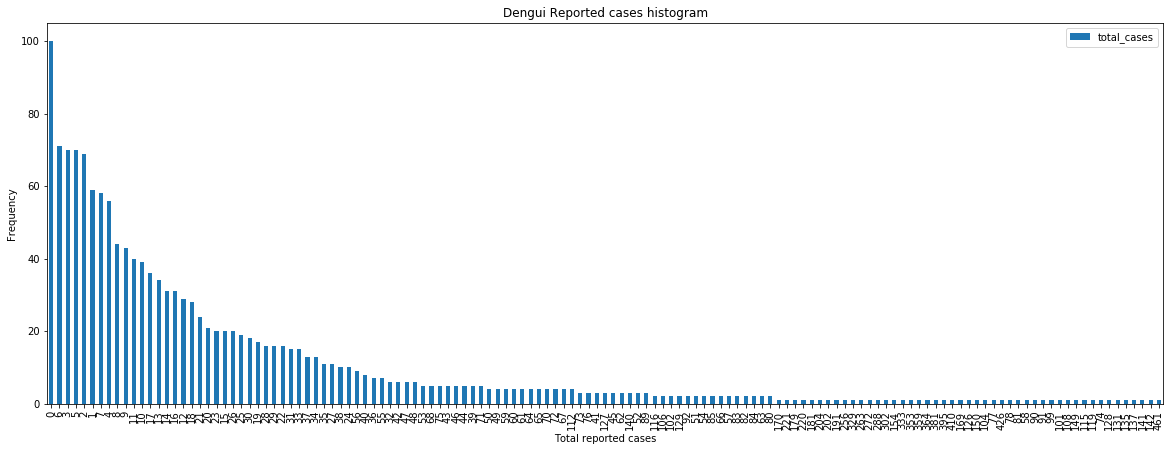

In [49]:
plt.figure( figsize=( 20, 7 ))
pd.value_counts(dengue_train_target.total_cases).plot.bar()
plt.title('Dengui Reported cases histogram')
plt.xlabel('Total reported cases')
plt.ylabel('Frequency')
plt.legend()
dengue_train_target.total_cases.value_counts()

In [50]:
dengue_train_target.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.0,1997.00,2002.0,2005.00,2010.0
weekofyear,1456.0,26.503434,15.019437,1.0,13.75,26.5,39.25,53.0
total_cases,1456.0,24.675137,43.596000,0.0,5.00,12.0,28.00,461.0


1. As per the target feature distribution, it is count based dependent variable. as per the mean and variance, data is showing more dispersed behaviour.
2. The data is not imbalanced. But lot of peaks are there in the total_cases column( after 75 percentile ).

##### Data Exploration

######  Checking duplicate rows

In [51]:

np.sum(dengue_train_features.duplicated())

0

In [52]:
np.sum(dengue_test_features.duplicated())

0

In [53]:
np.sum(dengue_train_target.duplicated())

0

In [54]:
# As per the file comparison of columns(city	year	weekofyear) in 
# dengue_features_train.csv and dengue_labels_train.csv. Its matching. adding total_cases column to main dataframe
dengue_train_features['total_cases'] = dengue_train_target['total_cases'].copy()
dengue_train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


###### Generate Descriptive Statistics

This summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [55]:
dengue_train_features.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


In [56]:
dengue_test_features.describe().T

,count,mean,std,min,25%,50%,75%,max
year,416.0,2010.766827,1.434835,2008.000000,2010.000000,2011.000000,2012.000000,2013.000000
weekofyear,416.0,26.439904,14.978257,1.000000,13.750000,26.000000,39.000000,53.000000
ndvi_ne,373.0,0.126050,0.164353,-0.463400,-0.001500,0.110100,0.263329,0.500400
ndvi_nw,405.0,0.126803,0.141420,-0.211800,0.015975,0.088700,0.242400,0.649000
ndvi_se,415.0,0.207702,0.079102,0.006200,0.148670,0.204171,0.254871,0.453043
ndvi_sw,415.0,0.201721,0.092028,-0.014671,0.134079,0.186471,0.253243,0.529043
precipitation_amt_mm,414.0,38.354324,35.171126,0.000000,8.175000,31.455000,57.772500,169.340000
reanalysis_air_temp_k,414.0,298.818295,1.469501,294.554286,297.751429,298.547143,300.240357,301.935714
reanalysis_avg_temp_k,414.0,299.353071,1.306233,295.235714,298.323214,299.328571,300.521429,303.328571
reanalysis_dew_point_temp_k,414.0,295.419179,1.523099,290.818571,294.335714,295.825000,296.643571,297.794286


###### Plot total dengue reported cases over time

In [57]:
if debug_test == False:
    for city_name in ['iq', 'sj']:
        data = dengue_train_features[dengue_train_features['city'] == city_name ]
        plt.figure( figsize=( 15, 7 ))
        plt.xlabel('Time')
        plt.ylabel('Total Report cases')
        plt.plot(data.week_start_date,data['total_cases'], label='Dengue   reported cases count' )
        city_name = "Iquitos" if city_name == 'iq' else "San Juan"        # sj for San Juan and iq for Iquitos
        plt.title( 'Dengue Disease Reported count from ' +  city_name ) 
        plt.legend()
        plt.show()

In [58]:
# Now we are creating the new features from week_start_date column
dengue_train_features['month']   =  dengue_train_features['week_start_date'].dt.month
dengue_train_features['quarter'] =  dengue_train_features['week_start_date'].dt.quarter
dengue_test_features['month']    =  dengue_test_features['week_start_date'].dt.month
dengue_test_features['quarter']  =  dengue_test_features['week_start_date'].dt.quarter

In [59]:
# setting the week_start_date as index
dengue_train_features.set_index('week_start_date',inplace=True)
dengue_test_features.set_index('week_start_date',inplace=True)

##### Yearwise pattern of each city

In [60]:
if debug_test == False:
    year_starting = 2000
    year_ending = 2011
    for city in ['iq', 'sj']:
        if city == 'sj':
            year_starting = 1990
            year_ending = 2009
        for year in range( year_starting, year_ending):
            yearwiseData = dengue_train_target[dengue_train_target['city'] == city][dengue_train_target['year'] == year]
            yearwiseData.plot( 'weekofyear', 'total_cases', figsize=(17,7))
            city_name = "Iquitos" if city == 'iq' else "San Juan"        # sj for San Juan and iq for Iquitos
            plt.title( 'Dengue Disease Reported count from ' +  city_name + ", year : " + str(year))
            plt.legend()

- The distribution of total cases reported per week of each year is not simmilar. 

In [61]:
def plotCasesReportedPeriodWise( data, period ):
    sj_max_cases = data[data['city'] == 'sj'].groupby([period])['total_cases'].agg('sum')
    iq_max_cases = data[data['city'] == 'iq'].groupby([period])['total_cases'].agg('sum')
    plt.figure( figsize=( 15, 7 ))
    plt.xlabel( period )
    plt.ylabel('Total Cases of Dengue')
    plt.plot( sj_max_cases, label='San Juan data' )
    plt.plot( iq_max_cases, label='Iquitos data')
    plt.yticks(np.arange(50,7000, step=500))
    plt.legend()
    plt.title( 'Total number of Dengue cases reported in each ' + period )
    plt.show()

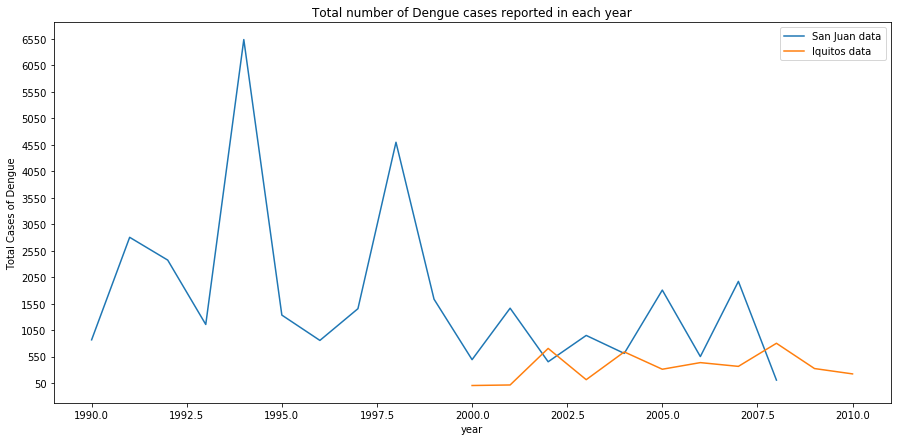

In [62]:
plotCasesReportedPeriodWise( dengue_train_target, 'year' )

Looks like, the required precautions are not handled before 2000.

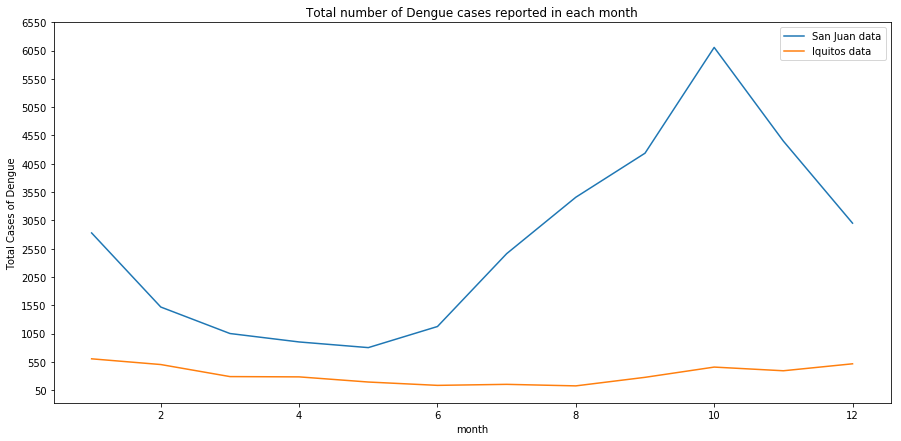

In [63]:
plotCasesReportedPeriodWise( dengue_train_features, 'month' )

The 1990 to 1999 data is affecting this monthly chart. Lets split the data and consider the data from from 1999 for our analysis.

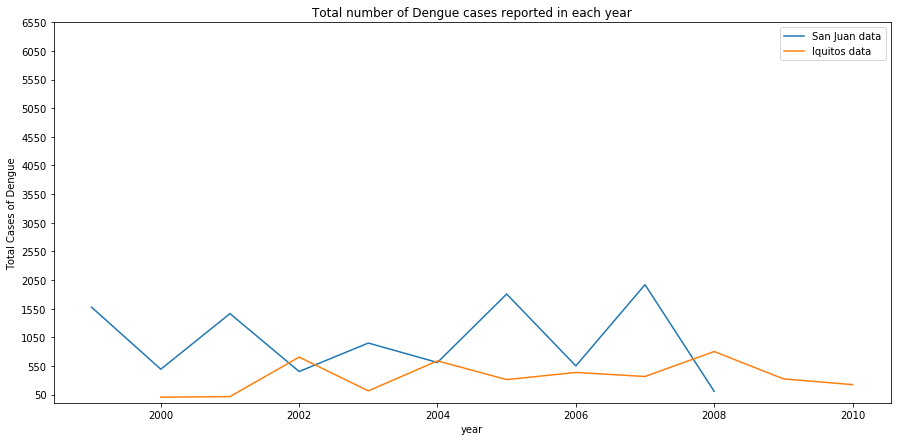

In [64]:
dengue_train_features_from1999 = dengue_train_features[dengue_train_features.index >  '01-Jan-1999'].copy()
plotCasesReportedPeriodWise( dengue_train_features_from1999, "year" )

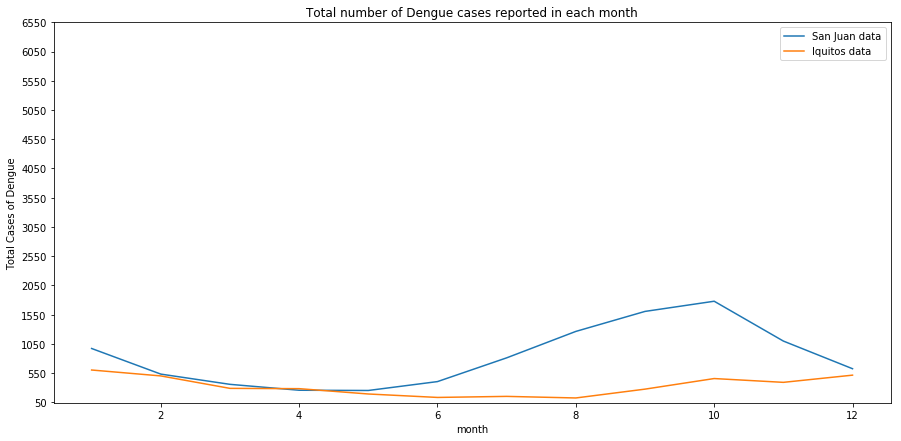

In [65]:
plotCasesReportedPeriodWise( dengue_train_features_from1999, "month" )

   - Most of the reported cases are in the end of year ( months 8,9,10,11 )
   - Less number of cases are reported in May month
      - From that we can understand that season plays a major role in dengue diseasse spreading
   - A seasonal pattern of minimal occurrence of diseasse is from March to June
   - Disease spread peak is from September to November.
   - As pr the data, from 2000, the reported cases are reduced compared to earlier years.
   

##### Let's check the missing data and its datatype

###### month and quarter column

In [66]:
dengue_train_features['month']    =  dengue_train_features['month'].astype('category')
dengue_train_features['quarter']  =  dengue_train_features['quarter'].astype('category')

In [67]:
dengue_test_features['month']     =  dengue_test_features['month'].astype('category')
dengue_test_features['quarter']   =  dengue_test_features['quarter'].astype('category')

###### city column

In [68]:
# start with the city column in train data
# In city column, 1456 entries are available
dengue_train_features['city'].unique()

array(['sj', 'iq'], dtype=object)

In [69]:
dengue_test_features['city'].unique()

array(['sj', 'iq'], dtype=object)

In [70]:
# we can consider the city feature as category, because only two city names are there. sj for San Juan and iq for Iquitos
# dengue_train_features['city'] = dengue_train_features['city'].astype('category')
# later we are going to split the data based on city column and after that this column is not required.

###### Year column

In [71]:
# year column contains 1456 entries
dengue_train_features['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

In [72]:
dengue_test_features['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013], dtype=int64)

In [73]:
# All the values in the year column are expected values
# but the data type int64 is not required to store year value
dengue_train_features['year'] = dengue_train_features['year'].astype('int16')
dengue_test_features['year'] = dengue_test_features['year'].astype('int16')
# we can consider this feature as categorical too. In model creation time, we will recheck that.

###### weekofyear column

In [74]:
# weekofyear column contains 1456 entries

In [75]:
dengue_train_features['weekofyear'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 53], dtype=int64)

In [76]:
# All the values in the year column are expected values
# but the data type int64 is not required to store weekofyear value
dengue_train_features['weekofyear'] = dengue_train_features['weekofyear'].astype('int8')
dengue_test_features['weekofyear'] = dengue_test_features['weekofyear'].astype('int8')
# we can consider this feature as categorical too. In model creation time, we will recheck that.

In [77]:
dengue_test_features['weekofyear'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 53], dtype=int64)

###### week_start_date column


In [78]:
# week_start_date column contains 1456 entries
# And we set week_start_date column as index. No further changes are required.

In [79]:
dengue_train_features = pd.get_dummies( dengue_train_features, columns=[ 'month','quarter'] )
dengue_test_features = pd.get_dummies( dengue_test_features, columns=[ 'month','quarter'] )

#### Data Splitting based on city column

Before analyzing the next set feautures, we need to split the data.
This dataset has two cities in it: San Juan, Puerto Rico (sj) and Iquitos, Peru (iq). 
The spread of dengue may follow different patterns between the two cities. So the dataset should be partitioned in to two sets.
And in the balance features, lot of data is missing.  We need to impute the features with the splited data set.

In [80]:
dengue_train_sj = dengue_train_features[dengue_train_features['city'] == 'sj'].copy()
dengue_train_iq = dengue_train_features[dengue_train_features['city'] == 'iq'].copy()
dengue_test_sj = dengue_test_features[dengue_test_features['city'] == 'sj'].copy()
dengue_test_iq = dengue_test_features[dengue_test_features['city'] == 'iq'].copy()

In [81]:
dengue_train_sj.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'quarter_1',
       'quarter_2', 'quarter_3', 'quarter_4'],
      dtype='object')

In [82]:
def plotMissingData( data, featureCount):
    fontSize = 20
    fig, axis = plt.subplots(figsize=(15,10))
    sns.heatmap(data.iloc[:,2:featureCount].isnull().reset_index(drop=True), ax = axis,  yticklabels = 20, cbar = False )
    plt.ylabel( "Row number", size = fontSize)
    plt.xlabel( "Feature name", size = fontSize)
    plt.title( str(data.iloc[0,0])+ " missing Data", size = fontSize)

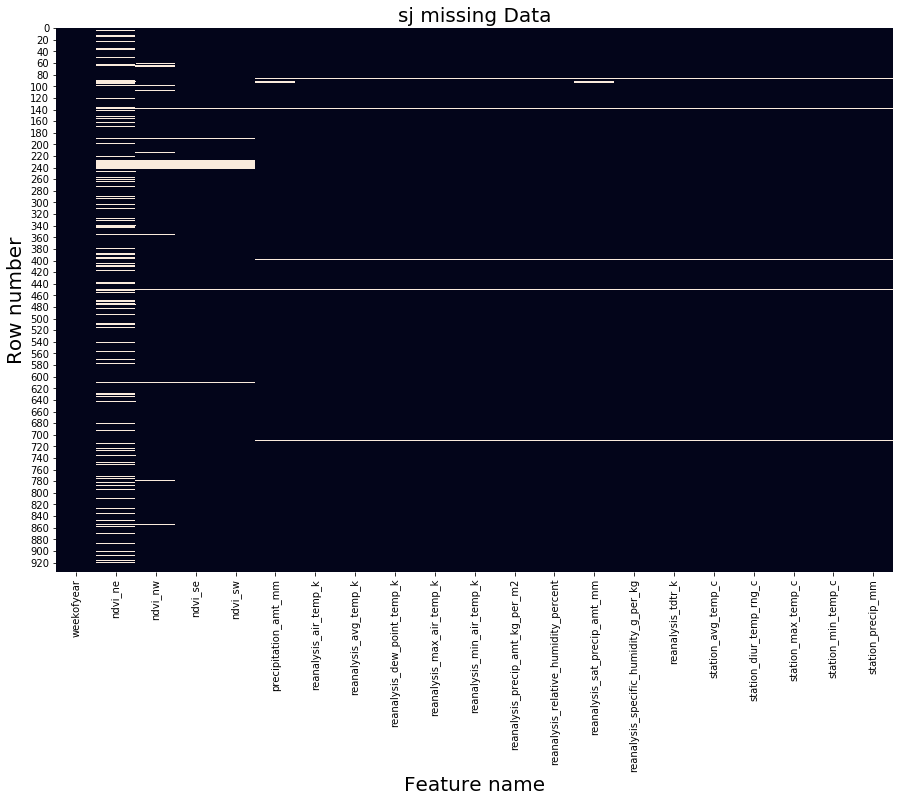

In [83]:
featureCount = 23
plotMissingData( dengue_train_sj, featureCount )

- nvdi_ne feature is more missing.
- ndvi_nw also missing in in some rows( but missing count is less ).
- In 5 rows , all the features are missing after ndvi features.

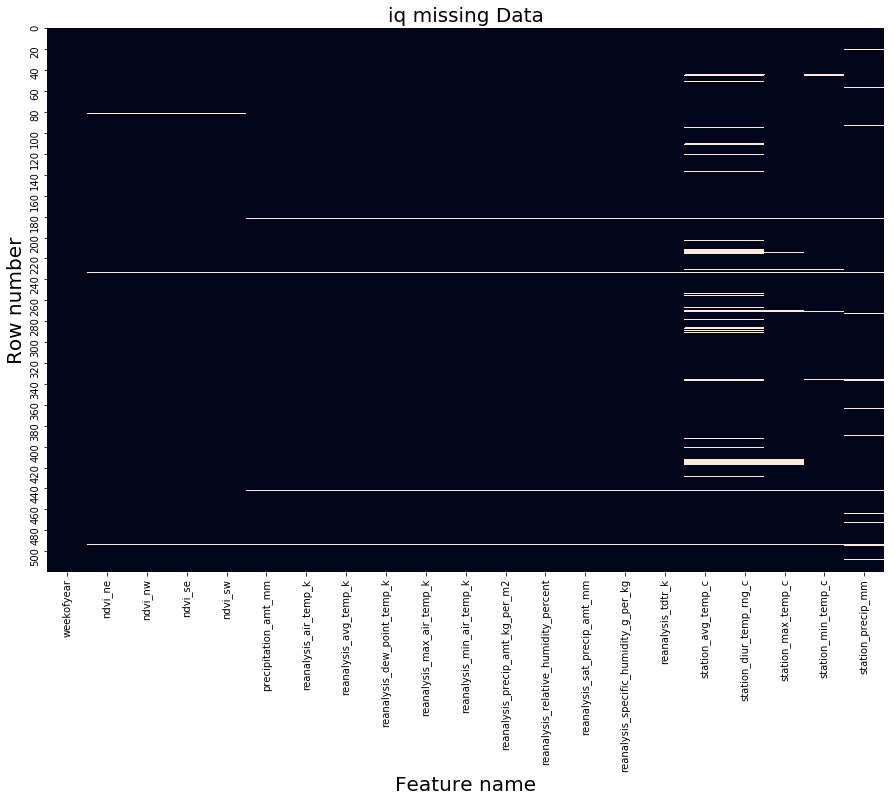

In [84]:
plotMissingData( dengue_train_iq, featureCount )

- 'station_avg_temp_c' , 'station_diur_temp_rng_c'and 'station_precip_mm' features are more missing.
- 'station_max_temp_c', 'station_min_temp_c' are  also missing in in some rows( but missing count is less ).
- In 4 rows, more than 15 features are missing.

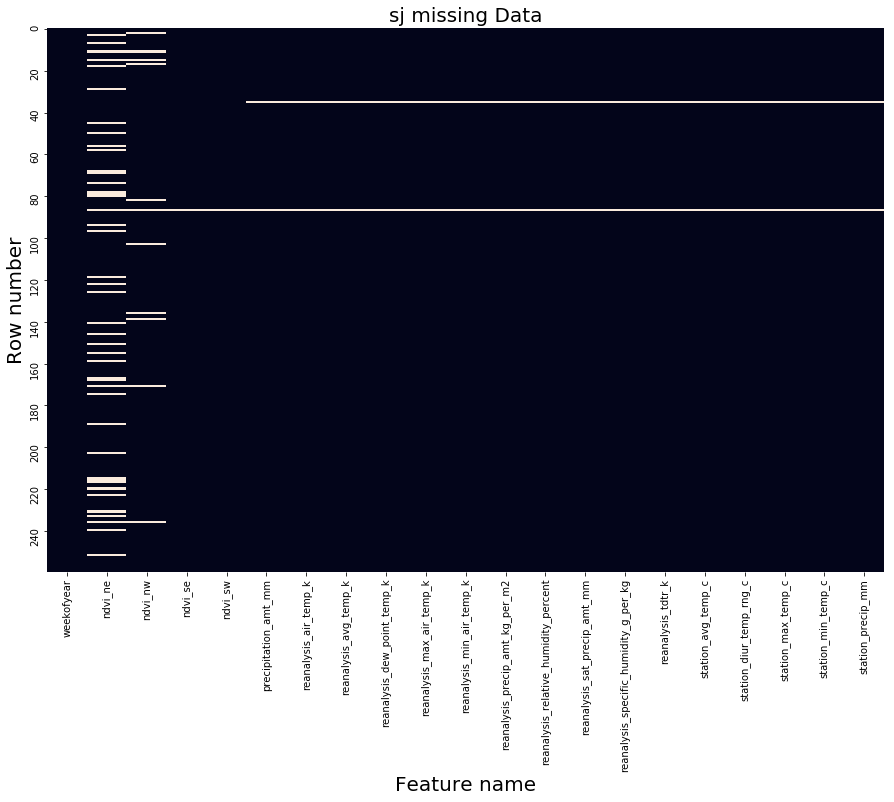

In [85]:
plotMissingData( dengue_test_sj, featureCount )

- nvdi_ne is more missing feature.
- ndvi_nw also missing in in some rows( but missing count is less ).
- In 2 rows , all the features are missing after ndvi features.

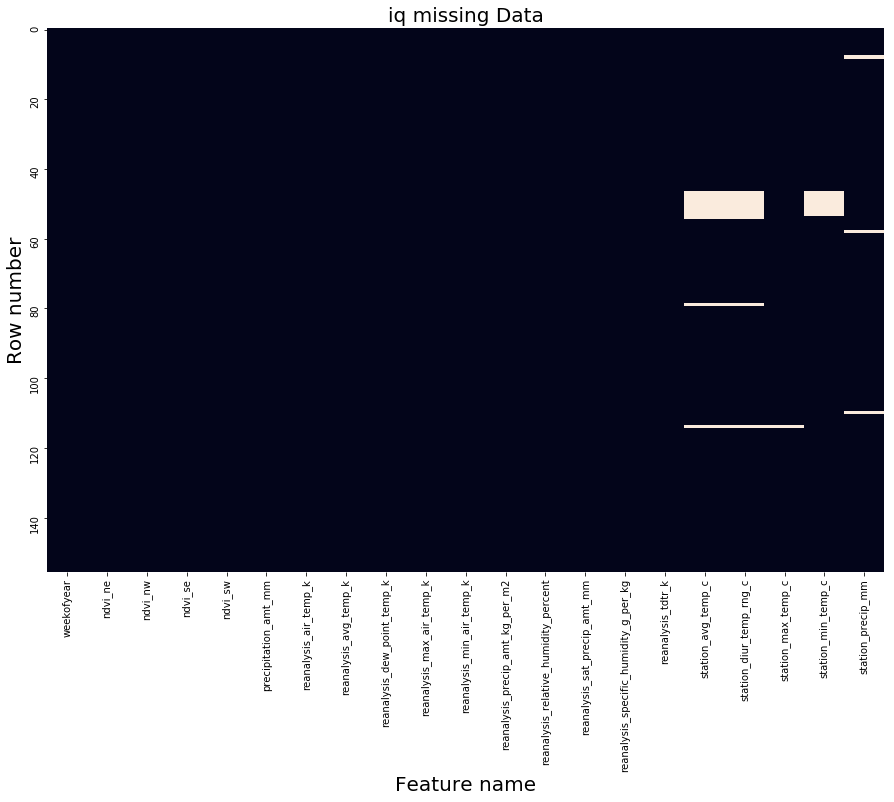

In [86]:
plotMissingData( dengue_test_iq, featureCount )

- 'station_avg_temp_c' , 'station_diur_temp_rng_c'and 'station_min_temp_c' features are more missing as continious records.
- 'station_max_temp_c' is  also missing in in some rows( but missing count is less ).

In [87]:
dengue_train_sj.describe().T

,count,mean,std,min,25%,50%,75%,max
year,936.0,1998.826923,5.212076,1990.000000,1994.000000,1999.000000,2003.000000,2008.000000
weekofyear,936.0,26.503205,15.021909,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,745.0,0.057925,0.107153,-0.406250,0.004500,0.057700,0.111100,0.493400
ndvi_nw,887.0,0.067469,0.092479,-0.456100,0.016425,0.068075,0.115200,0.437100
ndvi_se,917.0,0.177655,0.057166,-0.015533,0.139283,0.177186,0.212557,0.393129
ndvi_sw,917.0,0.165956,0.056073,-0.063457,0.129157,0.165971,0.202771,0.381420
precipitation_amt_mm,927.0,35.470809,44.606137,0.000000,0.000000,20.800000,52.180000,390.600000
reanalysis_air_temp_k,930.0,299.163653,1.236429,295.938571,298.195000,299.254286,300.132857,302.200000
reanalysis_avg_temp_k,930.0,299.276920,1.218637,296.114286,298.300000,299.378571,300.228571,302.164286
reanalysis_dew_point_temp_k,930.0,295.109519,1.569943,289.642857,293.847857,295.464286,296.418929,297.795714


##### Feature Correlation Analysis

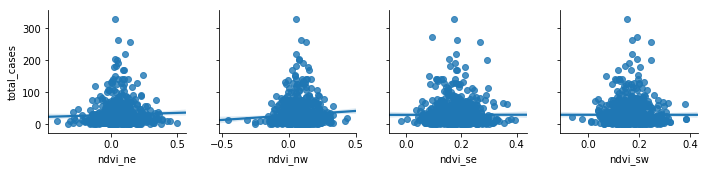

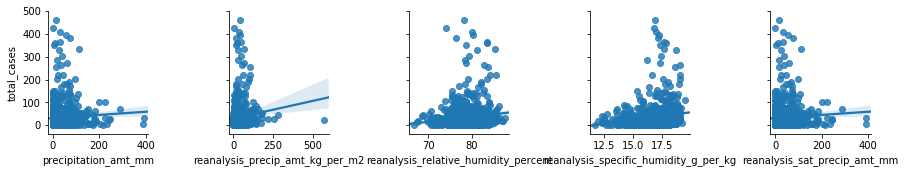

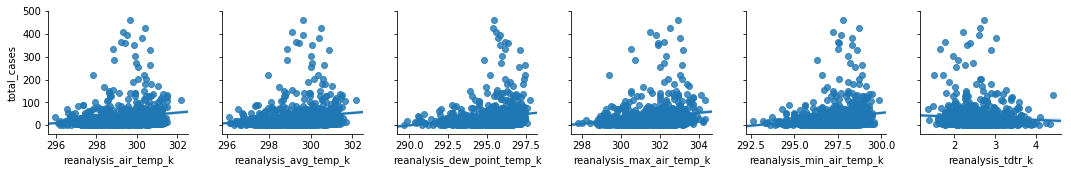

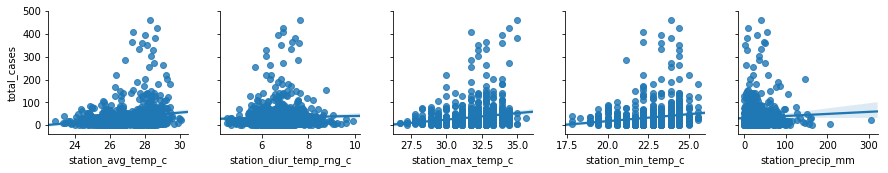

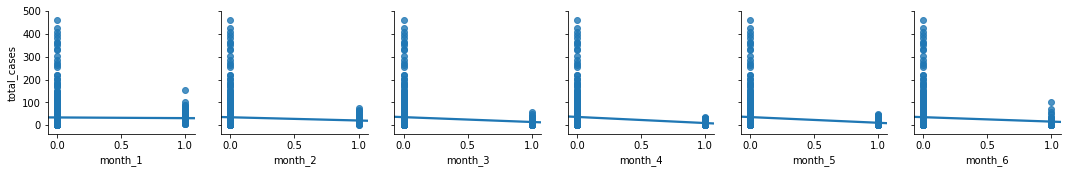

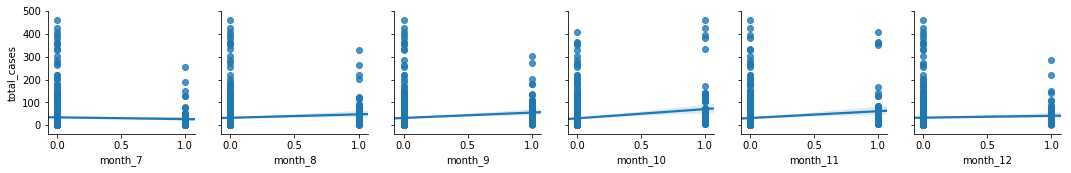

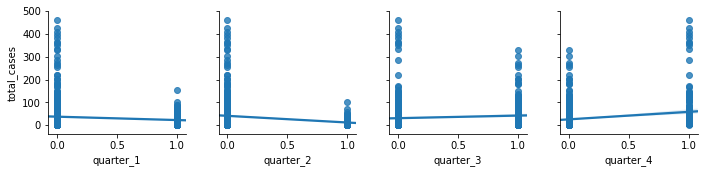

In [88]:
# plotting of pairwise relationships
sns.pairplot( dengue_train_sj, x_vars=['ndvi_ne', 'ndvi_nw', 'ndvi_se','ndvi_sw'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 
                                       'reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg',
                                       'reanalysis_sat_precip_amt_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=[ 'reanalysis_air_temp_k',
                                        'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                        'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                                       'reanalysis_tdtr_k'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
                                       'station_min_temp_c', 'station_precip_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['month_7','month_8', 'month_9', 'month_10', 'month_11', 'month_12'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['quarter_1','quarter_2', 'quarter_3', 'quarter_4'], y_vars=['total_cases'], kind="reg")

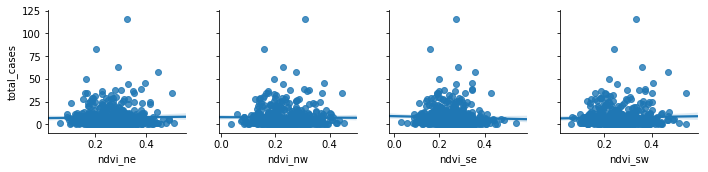

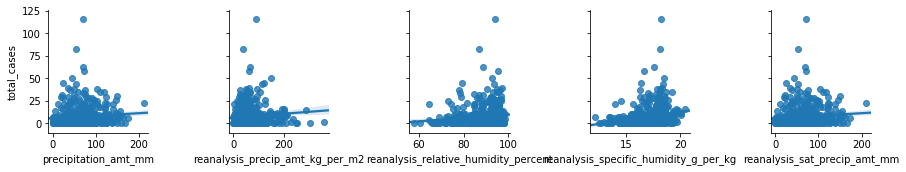

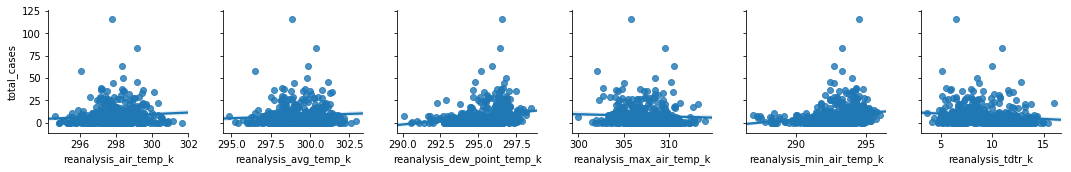

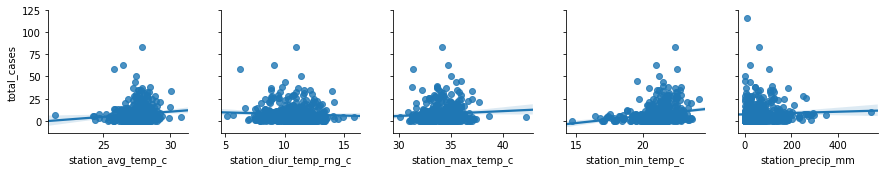

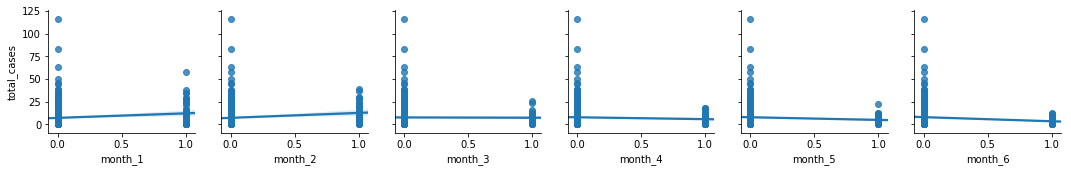

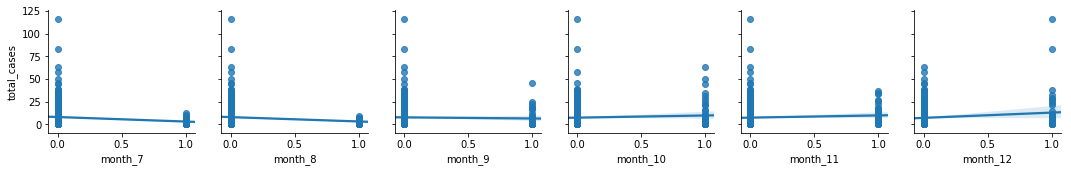

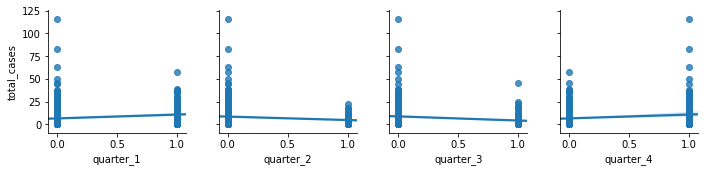

In [89]:
# plotting of pairwise relationships
sns.pairplot( dengue_train_iq, x_vars=['ndvi_ne', 'ndvi_nw', 'ndvi_se','ndvi_sw'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 
                                       'reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg',
                                       'reanalysis_sat_precip_amt_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=[ 'reanalysis_air_temp_k',
                                        'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                        'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                                       'reanalysis_tdtr_k'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
                                       'station_min_temp_c', 'station_precip_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['month_7','month_8', 'month_9', 'month_10', 'month_11', 'month_12'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['quarter_1','quarter_2', 'quarter_3', 'quarter_4'], y_vars=['total_cases'], kind="reg")

In [111]:
def plotVarCorr( data, title ):
    corr = data.corr( )
    fig = plt.figure(  figsize=( 15, 12 ) )
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1 )
    fig.colorbar(cax)
    ticks = np.arange(0,len(data.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.columns)
    plt.title( title )
    plt.show()

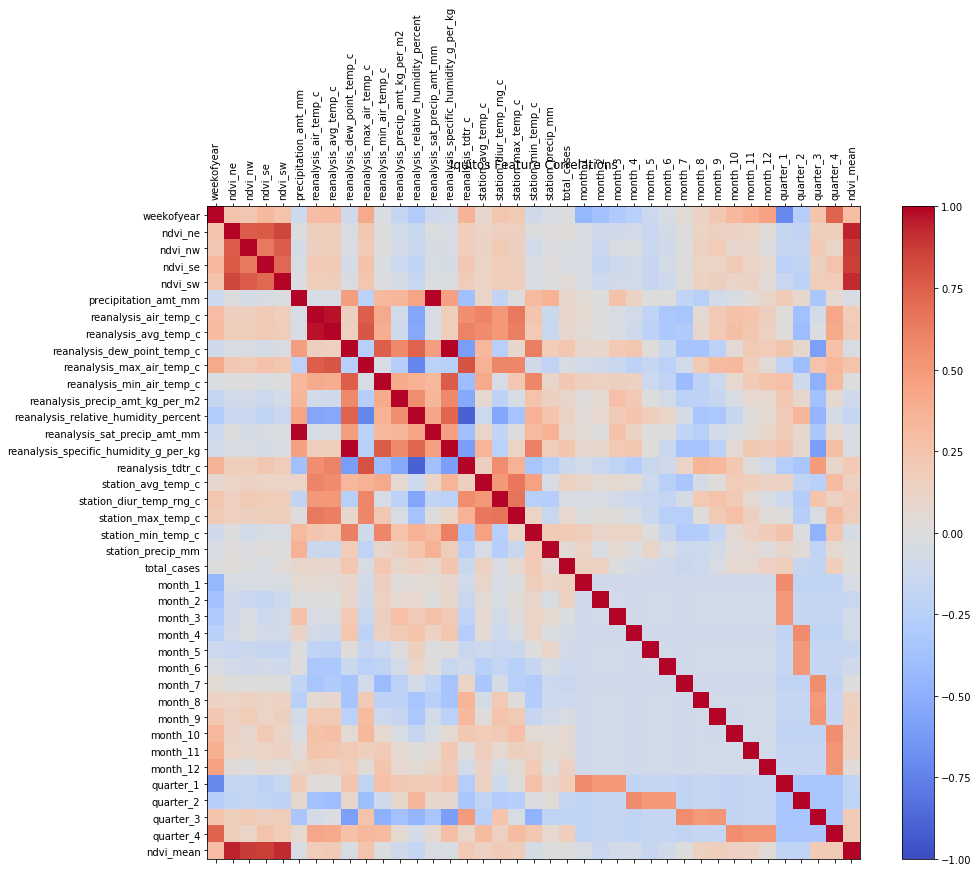

In [112]:
plotVarCorr( dengue_train_iq[dengue_train_iq.columns[2:]], 'Iquitos Feature Correlations' )

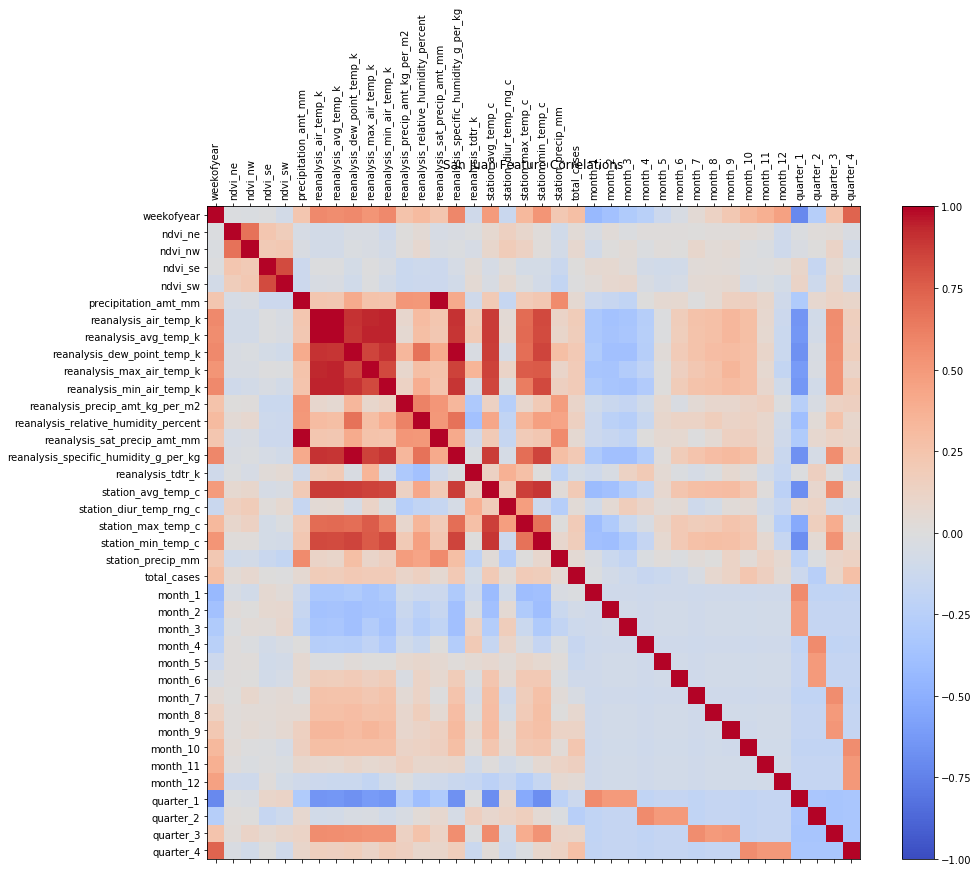

In [92]:
plotVarCorr( dengue_train_sj[dengue_train_sj.columns[2:]] ,'San Juan Feature Correlations' )

In [93]:
dengue_train_iq[dengue_train_iq.columns[2:]].corr()

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
weekofyear,1.000000,0.253895,0.220770,0.321254,0.256479,-0.116018,0.293305,0.305944,-0.100417,0.411810,...,0.047706,0.128739,0.217325,0.321751,0.378674,0.455577,-0.714756,-0.261619,0.248053,0.732162
ndvi_ne,0.253895,1.000000,0.764407,0.767745,0.842784,-0.012388,0.152740,0.167468,-0.031796,0.211516,...,-0.000948,0.120159,0.138786,0.125492,0.123527,0.024529,-0.150944,-0.186252,0.160478,0.175699
ndvi_nw,0.220770,0.764407,1.000000,0.644194,0.764829,-0.060257,0.152423,0.168796,-0.034734,0.203425,...,-0.004164,0.132545,0.184010,0.080947,0.097884,0.000625,-0.146851,-0.164505,0.194443,0.115200
ndvi_se,0.321254,0.767745,0.644194,1.000000,0.714577,-0.043946,0.196518,0.207895,-0.063731,0.260059,...,0.001829,0.119712,0.122527,0.202836,0.121186,0.068013,-0.218471,-0.187106,0.151811,0.252888
ndvi_sw,0.256479,0.842784,0.764829,0.714577,1.000000,-0.020351,0.163954,0.176197,-0.030800,0.226263,...,-0.006466,0.130732,0.154329,0.115531,0.131007,0.035497,-0.139748,-0.214767,0.173029,0.180497
precipitation_amt_mm,-0.116018,-0.012388,-0.060257,-0.043946,-0.020351,1.000000,-0.048534,-0.054303,0.471734,-0.228346,...,-0.193195,-0.246447,-0.080814,-0.042438,0.037287,0.097154,0.191735,0.090480,-0.332399,0.055115
reanalysis_air_temp_k,0.293305,0.152740,0.152423,0.196518,0.163954,-0.048534,1.000000,0.973319,0.151199,0.752356,...,-0.336662,0.051629,0.200354,0.270651,0.247157,0.150287,0.020926,-0.374860,-0.069525,0.427524
reanalysis_avg_temp_k,0.305944,0.167468,0.168796,0.207895,0.176197,-0.054303,0.973319,1.000000,0.142334,0.783955,...,-0.294361,0.081179,0.205570,0.282366,0.228332,0.135209,0.008938,-0.400225,-0.019554,0.414302
reanalysis_dew_point_temp_k,-0.100417,-0.031796,-0.034734,-0.063731,-0.030800,0.471734,0.151199,0.142334,1.000000,-0.253558,...,-0.344968,-0.348870,-0.226026,0.047788,0.200176,0.182919,0.234285,0.094366,-0.589423,0.269749
reanalysis_max_air_temp_k,0.411810,0.211516,0.203425,0.260059,0.226263,-0.228346,0.752356,0.783955,-0.253558,1.000000,...,-0.094491,0.195404,0.305849,0.320297,0.163745,0.025236,-0.184613,-0.396702,0.248821,0.331270


In [94]:
dengue_train_sj[dengue_train_sj.columns[2:]].corr()

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,month_7,month_8,month_9,month_10,month_11,month_12,quarter_1,quarter_2,quarter_3,quarter_4
weekofyear,1.000000,-0.020271,-0.023549,-0.009380,-0.075804,0.231961,0.575381,0.561001,0.578072,0.519083,...,0.045792,0.127052,0.212786,0.321908,0.377005,0.453914,-0.704628,-0.265032,0.242219,0.730285
ndvi_ne,-0.020271,1.000000,0.673037,0.234049,0.177792,-0.048727,-0.073170,-0.071176,-0.040008,-0.044553,...,0.003614,0.020443,0.022208,0.036176,0.008160,-0.100291,-0.020363,0.022587,0.028906,-0.032410
ndvi_nw,-0.023549,0.673037,1.000000,0.196343,0.214615,-0.032351,-0.077457,-0.076375,-0.026070,-0.046189,...,0.087629,0.033488,0.046979,-0.000145,-0.030126,-0.105100,-0.031415,0.002708,0.109504,-0.083588
ndvi_se,-0.009380,0.234049,0.196343,1.000000,0.821354,-0.119386,-0.014601,-0.011905,-0.062773,-0.007382,...,0.031022,0.032939,0.030050,-0.008832,-0.006978,0.017297,0.096125,-0.156275,0.060131,0.000465
ndvi_sw,-0.075804,0.177792,0.214615,0.821354,1.000000,-0.118752,-0.043488,-0.035999,-0.087787,-0.014890,...,0.041706,0.047021,0.061525,-0.060782,-0.028581,-0.068831,0.114494,-0.111713,0.095747,-0.100637
precipitation_amt_mm,0.231961,-0.048727,-0.032351,-0.119386,-0.118752,1.000000,0.233912,0.222311,0.402744,0.256677,...,-0.005076,0.052633,0.143464,0.155530,0.086269,-0.097415,-0.295752,0.075313,0.118906,0.097560
reanalysis_air_temp_k,0.575381,-0.073170,-0.077457,-0.014601,-0.043488,0.233912,1.000000,0.997495,0.903287,0.935089,...,0.259197,0.280308,0.332299,0.286262,0.072734,-0.121260,-0.646907,-0.078919,0.555888,0.162149
reanalysis_avg_temp_k,0.561001,-0.071176,-0.076375,-0.011905,-0.035999,0.222311,0.997495,1.000000,0.895123,0.938952,...,0.255965,0.278177,0.331563,0.281409,0.066577,-0.128979,-0.635781,-0.074183,0.551931,0.150295
reanalysis_dew_point_temp_k,0.578072,-0.040008,-0.026070,-0.062773,-0.087787,0.402744,0.903287,0.895123,1.000000,0.847236,...,0.254652,0.290879,0.304519,0.277619,0.094899,-0.130627,-0.667489,-0.046503,0.541844,0.164274
reanalysis_max_air_temp_k,0.519083,-0.044553,-0.046189,-0.007382,-0.014890,0.256677,0.935089,0.938952,0.847236,1.000000,...,0.223454,0.264713,0.338444,0.274054,0.067742,-0.176555,-0.612312,-0.037857,0.525978,0.116608


###### As per the feature correlation analysis, some feature are correlated more than 90%. so we can drop one of them
###### Iquitos data
1. Features  “precipitation_amount_mm”     and “reanalysis_sat_precip_amt_mm”          were found to be 100% correlated.
2. Features  “reanalysis_dew_point_temp_k” and “reanalysis_specific_humidity_g_per_kg” were found to be  99.77% correlated.
3. Features  “reanalysis_avg_temp_k”       and “reanalysis_air_temp_k”                 were found to be  97.33% correlated.

###### San Juan data
1. Features  “precipitation_amount_mm”     and “reanalysis_sat_precip_amt_mm”          were found to be 100% correlated.
2. Features  “reanalysis_dew_point_temp_k” and “reanalysis_specific_humidity_g_per_kg” were found to be  99.85% correlated.
3. Features  “reanalysis_avg_temp_k”       and “reanalysis_air_temp_k”                 were found to be  99.75% correlated.
4. Features  “reanalysis_max_air_temp_k”   and “reanalysis_avg_temp_k”                 were found to be  93.89% correlated.
5. Features  “reanalysis_min_air_temp_k”   and “reanalysis_avg_temp_k”                 were found to be  93.91% correlated.
6. Features  "reanalysis_dew_point_temp_k" and “reanalysis_air_temp_k”                 were found to be  90.33% correlated.

Based on the value reanalysis, we will decide feature deletion

Individually we analyzed each features in Dengue_LinearRegression.ipynb. As per the analysis, interpolation is required to fix the missing data.
In Dengue_LinearRegression.ipynb, we verified the below cases of each feature
1. Number of missing cases
2. The data is missing continiously or not.
3. Wheather the feature is depend upon any other feature or not.
    3.a For Max_temp type features, confirmed that, its more than min and avg fearures
    3.b Avg features calculated bases on Min and max. And compared with interpolate result. There is no adavantage, so we are going with interpolate for all features
4. Compared the model results with time interpolated data too. As per our data, thete is no missing weeks, so there is no change in interpolation.

###### Unit conversion( Kelvin to Celsius )
To set same type of units for all similar features, Temperatures in Kelvin are converted to Celsius using the equation
- TemperatureCelsius = TemperatureKelvin – 273.15

In [95]:
dengue_train_iq.reanalysis_tdtr_k.describe()

count    516.000000
mean       9.206783
std        2.448525
min        3.714286
25%        7.371429
50%        8.964286
75%       11.014286
max       16.028571
Name: reanalysis_tdtr_k, dtype: float64

reanalysis_tdtr_k is the diurnal temperature range (DTR). This is the difference between the daily maximum and minimum temperature. So no conversion is required.

In [96]:
def KelvinToCelsius( data ):
    k_to_c_conversion_factor = 273.15
    data['reanalysis_min_air_temp_k']   = data['reanalysis_min_air_temp_k'] - k_to_c_conversion_factor
    data['reanalysis_max_air_temp_k']   = data['reanalysis_max_air_temp_k'] - k_to_c_conversion_factor
    data['reanalysis_air_temp_k']       = data['reanalysis_air_temp_k'] - k_to_c_conversion_factor
    data['reanalysis_dew_point_temp_k'] = data['reanalysis_dew_point_temp_k'] - k_to_c_conversion_factor
    data['reanalysis_avg_temp_k']       = data['reanalysis_avg_temp_k'] - k_to_c_conversion_factor
    col = data.columns
    col = col.str.replace('temp_k', 'temp_c')
    data.columns = col.str.replace('tdtr_k', 'tdtr_c')
    return data

In [97]:
def prePorcessData( data ):
    data = KelvinToCelsius( data )
#    data.drop( columns='reanalysis_avg_temp_c', inplace=True)
#    data.drop( columns='reanalysis_dew_point_temp_c', inplace=True)
#    data.drop( columns='reanalysis_sat_precip_amt_mm', inplace=True)
    data.interpolate( method='time',inplace = True )
    return data

In [98]:
dengue_train_iq = prePorcessData( dengue_train_iq )
dengue_train_sj = prePorcessData( dengue_train_sj )
dengue_test_iq  = prePorcessData( dengue_test_iq )
dengue_test_sj  = prePorcessData( dengue_test_sj )

In [99]:
dengue_train_iq.describe().T

,count,mean,std,min,25%,50%,75%,max
year,520.0,2005.000000,2.918283,2000.000000,2002.750000,2005.000000,2007.250000,2010.000000
weekofyear,520.0,26.503846,15.029450,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,520.0,0.263589,0.081483,0.061729,0.199511,0.263528,0.320021,0.508357
ndvi_nw,520.0,0.238606,0.076613,0.035860,0.179530,0.232850,0.293832,0.454429
ndvi_se,520.0,0.249987,0.077441,0.029880,0.194164,0.249764,0.302550,0.538314
ndvi_sw,520.0,0.266520,0.086254,0.064183,0.203843,0.261871,0.324877,0.546017
precipitation_amt_mm,520.0,64.264519,35.101745,0.000000,39.147500,60.490000,85.757500,210.830000
reanalysis_air_temp_c,520.0,24.720528,1.167879,21.485714,23.942500,24.677857,25.495357,28.487143
reanalysis_avg_temp_c,520.0,25.983976,1.328685,21.742857,25.071429,25.978571,26.971429,29.778571
reanalysis_dew_point_temp_c,520.0,22.348466,1.413820,16.938571,21.446429,22.712857,23.398571,25.300000


###### New features exploration

As per the score and graphs, the model is not meeting to the expectation. Looks like we need to generate new features.

In the disease information, we got an idea about the mosquito life cycle and weather factors affecting dengue fever.

So we need to consider the weather factors of earlier weeks to identify the actual reason behind the disease spread.

In [101]:
dengue_train_sj.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_c',
       'reanalysis_avg_temp_c', 'reanalysis_dew_point_temp_c',
       'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_c',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'quarter_1',
       'quarter_2', 'quarter_3', 'quarter_4'],
      dtype='object')

In [103]:
#  New features from Satellite vegetation - Normalized difference vegetation index (NDVI)
# ndvi_se – Pixel southeast of city centroid
# ndvi_sw – Pixel southwest of city centroid
# ndvi_ne – Pixel northeast of city centroid
# ndvi_nw – Pixel northwest of city centroid
dengue_train_sj['ndvi_mean'] = dengue_train_sj[dengue_train_sj.columns[3:7]].mean(axis = 1)
dengue_train_iq['ndvi_mean'] = dengue_train_iq[dengue_train_iq.columns[3:7]].mean(axis = 1)
dengue_test_sj ['ndvi_mean']  = dengue_test_sj[ dengue_test_sj.columns [3:7]].mean(axis = 1)
dengue_test_iq ['ndvi_mean']  = dengue_test_iq[ dengue_test_iq.columns [3:7]].mean(axis = 1)

In [104]:
seven_weeks = 7
six_weeks = 6
five_weeks = 5
four_weeks = 4
three_weeeks = 3
two_weeks = 2

sj_lag = four_weeks
iq_lag = five_weeks

As per the trials, we got know that, the four weeks roolling features for San Juan is getting good results. For Iquitos, five weeks rolling features are good.

In [105]:
def addNewRolliingFeatures( data, columns, lagTime ):
    for col in columns:
        data[col + '_lagSum']  = data[col].rolling( lagTime ).sum()
        data[col + '_lagMean'] = data[col].rolling( lagTime ).mean()
        data[col + '_lagVar']  = data[col].rolling( lagTime ).var()
        data[col + '_lagstd']  = data[col].rolling( lagTime ).std()
        data[col + '_lagSkew']  = data[col].rolling( lagTime ).skew()
        data[col + '_lagKurt']  = data[col].rolling( lagTime ).kurt()
    return data

###### Data Splitting

In [106]:
def split_data( data, split_date ):
    return data[data.index <= split_date].copy(), \
           data[data.index >  split_date].copy()

For test data, we need to add some last records of train data for rolling.

In [ ]:
split_date_for_test_iq = '28-May-2010'
split_date_for_test_sj = '01-Apr-2008'
temp, roll_data_for_test_iq = split_data( dengue_train_iq, split_date_for_test_iq )
temp, roll_data_for_test_sj = split_data( dengue_train_sj, split_date_for_test_sj )

In [ ]:
roll_data_for_test_sj.drop( columns = ['total_cases'], inplace = True )
roll_data_for_test_iq.drop( columns = ['total_cases'], inplace = True )

In [ ]:
dengue_test_iq = roll_data_for_test_iq.append( dengue_test_iq, sort=True )

In [ ]:
dengue_test_sj = roll_data_for_test_sj.append( dengue_test_sj, sort=True )

In [ ]:
rollCol = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','ndvi_mean',
           'reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg',
           'reanalysis_air_temp_c','reanalysis_max_air_temp_c','reanalysis_min_air_temp_c','reanalysis_tdtr_c',
           'reanalysis_precip_amt_kg_per_m2',
           'station_precip_mm','station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c',
           'reanalysis_sat_precip_amt_mm','reanalysis_avg_temp_c','reanalysis_dew_point_temp_c',]
dengue_train_iq = addNewRolliingFeatures( dengue_train_iq, rollCol, iq_lag )
dengue_train_sj = addNewRolliingFeatures( dengue_train_sj, rollCol, sj_lag )
dengue_test_iq  = addNewRolliingFeatures( dengue_test_iq, rollCol, iq_lag )
dengue_test_sj  = addNewRolliingFeatures( dengue_test_sj, rollCol, sj_lag )

In [ ]:
# trimming the lagged data( NaN data)
split_date_for_test_iq = '25-Jun-2010'
split_date_for_test_sj = '22-Apr-2008'
temp, dengue_test_iq = split_data( dengue_test_iq, split_date_for_test_iq )
temp, dengue_test_sj = split_data( dengue_test_sj, split_date_for_test_sj )

In [ ]:
split_date_for_train_iq  = '22-Jul-2000'
split_date_for_train_sj = '14-May-1990'
temp, dengue_train_iq = split_data( dengue_train_iq, split_date_for_train_iq )
temp, dengue_train_sj = split_data( dengue_train_sj, split_date_for_train_sj )

In [ ]:
## setting the submisssion format
submission_sj = pd.DataFrame( dengue_test_sj, columns = ['city'])
submission_iq = pd.DataFrame( dengue_test_iq, columns = ['city'])
submission_sj.reset_index( inplace = True)
submission_sj['year'] = submission_sj['week_start_date'].dt.year
submission_sj['weekofyear'] = submission_sj['week_start_date'].dt.weekofyear
submission_iq.reset_index( inplace = True)
submission_iq['year'] = submission_iq['week_start_date'].dt.year
submission_iq['weekofyear'] = submission_iq['week_start_date'].dt.weekofyear
submission = submission_sj.append( submission_iq )
submission.drop( columns = ['week_start_date'], inplace = True )

In [ ]:
submission.head()

###### Recursive Feature Elimination & Cross-Validated Selection

#### San Juan full train data In RFE 
X = pd.DataFrame( dengue_train_sj)
y = dengue_train_sj.total_cases
X.drop( columns = ['city','year','total_cases'], inplace = True )

##### create a base classifier used to evaluate a subset of attributes
linear_sj_model = LinearRegression()

##### create the RFE model and select n attributes
rfe_selector = RFECV( linear_sj_model, min_features_to_select=12, step=1, cv=30)
rfe = rfe_selector.fit(X, y)
col_sj = rfe_selector.support_
X_Select = X.loc[:, rfe_selector.support_]
print( "San Juan Selected Features : ", X.columns[rfe_selector.support_] )

##### Split based on the newly selected features and train and test again
X_sj_Full_train, X_sj_Full_test, Y_sj_Full_train, Y_sj_Full_test = train_test_split( X_Select, y, shuffle = False)
linear_sj_model.fit(X_sj_Full_train, Y_sj_Full_train)
Y_sj_Full_pred = linear_sj_model.predict(X_sj_Full_test)

score = linear_sj_model.score(X_sj_Full_test, Y_sj_Full_test)

linReg_sj_MAE = mean_absolute_error(Y_sj_Full_test, Y_sj_Full_pred)
print( "Linear Regression San Juan MAE    :" , linReg_sj_MAE )
print( "Linear Regression San Juan Score :" , score )

- San Juan Selected Features :  Index(['weekofyear', 'quarter_4',
       'reanalysis_specific_humidity_g_per_kg_lagMean',
       'reanalysis_specific_humidity_g_per_kg_lagSum',
       'station_avg_temp_c_lagSum', 'station_avg_temp_c_lagMean',
       'station_min_temp_c_lagMean', 'station_min_temp_c_lagSum',
       'station_max_temp_c_lagMean', 'station_max_temp_c_lagSum', 'quarter_2',
       'reanalysis_min_air_temp_c_lagSum',
       'reanalysis_min_air_temp_c_lagMean'],
      dtype='object')
- Linear Regression San Juan MAE    : 23.879068168063057
- Linear Regression San Juan Score : -0.16271402566160065

In [ ]:
split_date_sj = '01-Jan-1999'
temp, dengue_train_sj_after_1998 = split_data( dengue_train_sj, split_date_sj )

##### San Juan train data from 1999 data In RFE 
###### In the data from 1990 to 1998, we saw lot of up and down, so we are trying without those data
X = pd.DataFrame( dengue_train_sj_after_1998)
y = dengue_train_sj_after_1998.total_cases
X.drop( columns = ['city','year','total_cases'], inplace = True )

##### create a base classifier used to evaluate a subset of attributes
linear_sj_model = LinearRegression()

##### create the RFE model and select n attributes
rfe_selector = RFECV( linear_sj_model, min_features_to_select=10, step=1, cv=25)
rfe = rfe_selector.fit(X, y)
col_sj = rfe_selector.support_
X_Select = X.loc[:, rfe_selector.support_]
print( "San Juan Selected Features : ", X.columns[rfe_selector.support_] )

###### Split based on the newly selected features and train and test again
X_sj_train, X_sj_test, Y_sj_train, Y_sj_test = train_test_split( X_Select, y, shuffle = False)
linear_sj_model.fit(X_sj_train, Y_sj_train)
Y_sj_pred = linear_sj_model.predict(X_sj_test)

score = linear_sj_model.score(X_sj_test, Y_sj_test)

linReg_sj_MAE = mean_absolute_error(Y_sj_test, Y_sj_pred)
print( "Linear Regression San Juan MAE   :" , linReg_sj_MAE )
print( "Linear Regression San Juan Score :" , score )

- San Juan Selected Features :  Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'month_3', 'month_6',
       'month_7', 'quarter_1', 'ndvi_ne_lagSum', 'ndvi_ne_lagMean',
       'ndvi_ne_lagVar', 'ndvi_nw_lagSum', 'ndvi_nw_lagMean', 'ndvi_nw_lagVar',
       'ndvi_se_lagVar', 'ndvi_sw_lagSum', 'ndvi_sw_lagMean', 'ndvi_sw_lagVar',
       'reanalysis_air_temp_c_lagSum', 'reanalysis_air_temp_c_lagVar',
       'station_avg_temp_c_lagVar', 'station_min_temp_c_lagVar'],
      dtype='object')
- Linear Regression San Juan MAE   : 13.689052206510793
- Linear Regression San Juan Score : 0.38200321039274926

##### Iquitos full train data  In RFE
X = pd.DataFrame( dengue_train_iq)
y = dengue_train_iq.total_cases

X.drop( columns = ['city','year','total_cases'], inplace = True )

###### create a base classifier used to evaluate a subset of attributes
linear_iq_model = LinearRegression()
print("")
###### create the RFE model and select n attributes
rfe_selector = RFECV( linear_iq_model, min_features_to_select=10, step=1, cv=20)
rfe = rfe_selector.fit(X, y)
col_iq = rfe_selector.support_
X_Select = X.loc[:, col_iq ]

print( "Iquitos Selected Features : ", X.columns[rfe_selector.support_] )

###### Split based on the newly selected features and train and test again
X_iq_train, X_iq_test, Y_iq_train, Y_iq_test = train_test_split( X_Select, y, shuffle = False)
linear_iq_model.fit(X_iq_train, Y_iq_train)
Y_iq_pred = linear_iq_model.predict(X_iq_test)

linReg_iq_MAE = mean_absolute_error(Y_iq_test, Y_iq_pred)
print( "Linear Regression Iquitos MAE   :" , linReg_iq_MAE )

score = linear_iq_model.score(X_iq_test, Y_iq_test)
print( "Linear Regression Iquitos Score :" , score )

pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "Total MAE : ", mean_absolute_error( y_test, pred ))

- Iquitos Selected Features :  Index(['month_10', 'month_11', 'month_12', 'quarter_1', 'quarter_2',
       'quarter_3', 'quarter_4', 'ndvi_ne_lagSum', 'ndvi_ne_lagMean',
       'ndvi_ne_lagVar', 'ndvi_nw_lagSum', 'ndvi_nw_lagMean', 'ndvi_nw_lagVar',
       'ndvi_se_lagSum', 'ndvi_se_lagMean', 'ndvi_se_lagVar', 'ndvi_sw_lagSum',
       'ndvi_sw_lagMean', 'ndvi_sw_lagVar',
       'reanalysis_relative_humidity_percent_lagSum',
       'reanalysis_relative_humidity_percent_lagMean',
       'reanalysis_specific_humidity_g_per_kg_lagSum',
       'reanalysis_specific_humidity_g_per_kg_lagMean',
       'reanalysis_air_temp_c_lagSum', 'reanalysis_air_temp_c_lagMean',
       'reanalysis_max_air_temp_c_lagSum', 'reanalysis_max_air_temp_c_lagMean',
       'reanalysis_min_air_temp_c_lagSum', 'reanalysis_min_air_temp_c_lagMean',
       'station_avg_temp_c_lagSum', 'station_avg_temp_c_lagMean',
       'station_diur_temp_rng_c_lagSum', 'station_diur_temp_rng_c_lagMean',
       'station_min_temp_c_lagSum', 'station_min_temp_c_lagMean'],
      dtype='object')
- Linear Regression Iquitos MAE   : 7.539377611736919
- Linear Regression Iquitos Score : 0.018124338005907514
- Total MAE :  10.07431884765625

##### Linear Regression With RFE selected features

In [ ]:
### RFE columns
col_full_sj = ['weekofyear', 'quarter_4',
 'reanalysis_specific_humidity_g_per_kg_lagMean',
 'reanalysis_specific_humidity_g_per_kg_lagSum',
 'station_avg_temp_c_lagSum', 'station_avg_temp_c_lagMean',
 'station_min_temp_c_lagMean', 'station_min_temp_c_lagSum',
 'station_max_temp_c_lagMean', 'station_max_temp_c_lagSum', 'quarter_2',
 'reanalysis_min_air_temp_c_lagSum',
 'reanalysis_min_air_temp_c_lagMean']
col_sj = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'month_3', 'month_6',
 'month_7', 'quarter_1', 'ndvi_ne_lagSum', 'ndvi_ne_lagMean',
 'ndvi_ne_lagVar', 'ndvi_nw_lagSum', 'ndvi_nw_lagMean', 'ndvi_nw_lagVar',
 'ndvi_se_lagVar', 'ndvi_sw_lagSum', 'ndvi_sw_lagMean', 'ndvi_sw_lagVar',
 'reanalysis_air_temp_c_lagSum', 'reanalysis_air_temp_c_lagVar',
 'station_avg_temp_c_lagVar', 'station_min_temp_c_lagVar']
col_iq = ['month_10', 'month_11', 'month_12', 'quarter_1', 'quarter_2',
       'quarter_3', 'quarter_4', 'ndvi_ne_lagSum', 'ndvi_ne_lagMean',
       'ndvi_ne_lagVar', 'ndvi_nw_lagSum', 'ndvi_nw_lagMean', 'ndvi_nw_lagVar',
       'ndvi_se_lagSum', 'ndvi_se_lagMean', 'ndvi_se_lagVar', 'ndvi_sw_lagSum',
       'ndvi_sw_lagMean', 'ndvi_sw_lagVar',
       'reanalysis_relative_humidity_percent_lagSum',
       'reanalysis_relative_humidity_percent_lagMean',
       'reanalysis_specific_humidity_g_per_kg_lagSum',
       'reanalysis_specific_humidity_g_per_kg_lagMean',
       'reanalysis_air_temp_c_lagSum', 'reanalysis_air_temp_c_lagMean',
       'reanalysis_max_air_temp_c_lagSum', 'reanalysis_max_air_temp_c_lagMean',
       'reanalysis_min_air_temp_c_lagSum', 'reanalysis_min_air_temp_c_lagMean',
       'station_avg_temp_c_lagSum', 'station_avg_temp_c_lagMean',
       'station_diur_temp_rng_c_lagSum', 'station_diur_temp_rng_c_lagMean',
       'station_min_temp_c_lagSum', 'station_min_temp_c_lagMean']

In [ ]:
X_dengue_test_sj_Full = pd.DataFrame( dengue_test_sj, columns = col_full_sj)
X_dengue_test_sj = pd.DataFrame( dengue_test_sj, columns = col_sj)
X_dengue_test_iq = pd.DataFrame( dengue_test_iq, columns = col_iq)

In [ ]:
X = pd.DataFrame( dengue_train_sj, columns = col_full_sj)
y = dengue_train_sj.total_cases

##### create a base classifier used to evaluate a subset of attributes
linear_sj_Full_model = LinearRegression()
X_sj_Full_train, X_sj_Full_test, Y_sj_Full_train, Y_sj_Full_test = train_test_split( X, y, shuffle = False)
linear_sj_Full_model.fit( X_sj_Full_train, Y_sj_Full_train)
Y_sj_Fullpred = linear_sj_Full_model.predict(X_sj_Full_test)
Y_sj_pred_test = pd.Series(map(int, map(round, linear_sj_Full_model.predict( X_dengue_test_sj_Full ))))
score = linear_sj_Full_model.score(X_sj_Full_test, Y_sj_Full_test)

linReg_sj_MAE = mean_absolute_error(Y_sj_Full_test, Y_sj_Fullpred)
print( "Linear Regression San Juan MAE   :" , linReg_sj_MAE )
print( "Linear Regression San Juan Score :" , score )

In [ ]:
X = pd.DataFrame( dengue_train_sj_after_1998, columns = col_sj)
y = dengue_train_sj_after_1998.total_cases

linear_sj_model = LinearRegression()
X_sj_train, X_sj_test, Y_sj_train, Y_sj_test = train_test_split( X, y, shuffle = False)
linear_sj_model.fit(X_sj_train, Y_sj_train)
Y_sj_pred = linear_sj_model.predict(X_sj_test)
Y_sj_pred_test_1999 = pd.Series(map(int, map(round, linear_sj_model.predict( X_dengue_test_sj ))))

score = linear_sj_model.score(X_sj_test, Y_sj_test)

linReg_sj_MAE = mean_absolute_error(Y_sj_test, Y_sj_pred)
print( "Linear Regression San Juan MAE   :" , linReg_sj_MAE )
print( "Linear Regression San Juan Score :" , score )

In [ ]:
X = pd.DataFrame( dengue_train_iq, columns = col_iq)
y = dengue_train_iq.total_cases

linear_iq_model = LinearRegression()

X_iq_train, X_iq_test, Y_iq_train, Y_iq_test = train_test_split( X, y, shuffle = False)
linear_iq_model.fit(X_iq_train, Y_iq_train)
Y_iq_pred = linear_iq_model.predict(X_iq_test)
Y_iq_pred_test = pd.Series(map(int, map(round, linear_iq_model.predict( X_dengue_test_iq ))))

linReg_iq_MAE = mean_absolute_error(Y_iq_test, Y_iq_pred)
print( "Linear Regression Iquitos MAE   : " , linReg_iq_MAE )

score = linear_iq_model.score(X_iq_test, Y_iq_test)
print( "Linear Regression Iquitos Score : " , score )

In [ ]:
submission_LR = Y_sj_pred_test.append(Y_iq_pred_test)
submission_LR_1999 = Y_sj_pred_test_1999.append(Y_iq_pred_test)
submission['total_cases_LR_Full'] = submission_LR
submission['total_cases_LR_1999'] = submission_LR_1999

In [ ]:
pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "Total MAE (San Juan after 1998) : ", mean_absolute_error( y_test, pred ))

pred = list(Y_sj_Fullpred)  + list(Y_iq_pred)
y_test = list( Y_sj_Full_test ) + list ( Y_iq_test )
print( "Total MAE (San Juan Full Data)  : ", mean_absolute_error( y_test, pred ))

###### Lasso

In [ ]:
# Tested with a range of alpha values
clf = LassoCV( alphas = [1,4,5,9,10,20,40,34.42,36,34.45,34.4] )
clf.fit( X_sj_Full_train, Y_sj_Full_train )
Y_sj_Full_pred = clf.predict( X_sj_Full_test )
Y_sj_pred_test = pd.Series(map(int, map(round, clf.predict( X_dengue_test_sj_Full ))))
score = clf.score( X_sj_Full_test, Y_sj_Full_test)
linReg_sj_MAE = mean_absolute_error(Y_sj_Full_test, Y_sj_Full_pred)
print( " San Juan Full data ")
print( "Linear Model Lasso San Juan MAE :" , linReg_sj_MAE )
print( "Linear Model Lasso alpha        :" , clf.alpha_ )
print( "Linear Regression San juan Score:" , score )

clf = LassoCV( alphas = [0.035,0.06,0.04,0.036,0.2,0.37,0.4,0.5,1] )
clf.fit( X_sj_train, Y_sj_train )
Y_sj_pred = clf.predict( X_sj_test )
Y_sj_pred_test_1999 = pd.Series(map(int, map(round, clf.predict( X_dengue_test_sj ))))
score = clf.score( X_sj_test, Y_sj_test)
linReg_sj_MAE = mean_absolute_error(Y_sj_test, Y_sj_pred)
print( " San Juan data from 1999")
print( "Linear Model Lasso San Juan MAE :" , linReg_sj_MAE )
print( "Linear Model Lasso alpha        :" , clf.alpha_ )
print( "Linear Regression San juan Score:" , score )

clf = LassoCV( alphas = [0.1,0.8,1,3,3.9,4.5,4.36,4.35,4.37] )
clf.fit( X_iq_train, Y_iq_train )
Y_iq_pred = clf.predict( X_iq_test )
Y_iq_pred_test = pd.Series(map(int, map(round, clf.predict( X_dengue_test_iq ))))
score = clf.score( X_iq_test, Y_iq_test)
linReg_iq_MAE = mean_absolute_error(Y_iq_test, Y_iq_pred)
print( 'Iquitos data ')
print( "Linear Model Lasso Iquitos MAE  :" , linReg_iq_MAE )
print( "Linear Model Lasso alpha        :" , clf.alpha_ )
print( "Linear Regression Iquitos Score :" , score )
print()
pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "Total MAE (San Juan after 1998) : ", mean_absolute_error( y_test, pred ))

pred = list(Y_sj_Fullpred)  + list(Y_iq_pred)
y_test = list( Y_sj_Full_test ) + list ( Y_iq_test )
print( "Total MAE (San Juan Full Data)  : ", mean_absolute_error( y_test, pred ))

In [ ]:
submission_Lasso = Y_sj_pred_test.append(Y_iq_pred_test)
submission_Lasso_1999 = Y_sj_pred_test_1999.append(Y_iq_pred_test)
submission['total_cases_Lasso_Full'] = submission_Lasso
submission['total_cases_Lasso_1999'] = submission_Lasso_1999

###### Ridge

In [ ]:
clf = RidgeCV( alphas = [1,4,4.45,4.5,4.55,5,5.2,5.5,6,7,89] )
clf.fit( X_sj_Full_train, Y_sj_Full_train )
Y_sj_Full_pred = clf.predict( X_sj_Full_test )
Y_sj_pred_test = pd.Series(map(int, map(round, clf.predict( X_dengue_test_sj_Full ))))

score = clf.score( X_sj_Full_test, Y_sj_Full_test)
linReg_sj_MAE = mean_absolute_error(Y_sj_Full_test, Y_sj_Full_pred)
print( " San Juan Full data ")
print( "Linear Model Ridge San Juan MAE :" , linReg_sj_MAE )
print( "Linear Model Ridge alpha        :" , clf.alpha_ )
print( "Linear Regression San juan Score:" , score )

clf = RidgeCV( alphas = [0.1,0.6,1.58,1.63,1.62,1.61,2,3,4,5] )
clf.fit( X_sj_train, Y_sj_train )
Y_sj_pred = clf.predict( X_sj_test )
Y_sj_pred_test_1999 = pd.Series(map(int, map(round, clf.predict( X_dengue_test_sj ))))
linReg_sj_MAE = mean_absolute_error(Y_sj_test, Y_sj_pred)
score = clf.score( X_sj_test, Y_sj_test)
print( "Linear Model Ridge San Juan MAE :" , linReg_sj_MAE )
print( "Linear Model Ridge alpha        :" , clf.alpha_ )
print( "Linear Regression San juan Score:" , score )

clf = RidgeCV( alphas = [0.1,0.2,0.7,1,1.55,1.4,1.7,1.6,1.68,2,3,4,5,8,9,10,15,20] )
clf.fit( X_iq_train, Y_iq_train )
Y_iq_pred = clf.predict( X_iq_test )
Y_iq_pred_test = pd.Series(map(int, map(round, clf.predict( X_dengue_test_iq ))))
linReg_iq_MAE = mean_absolute_error(Y_iq_test, Y_iq_pred)
score = clf.score( X_iq_test, Y_iq_test)
print( "Linear Model Ridge Iquitos MAE  :" , linReg_iq_MAE )
print( "Linear Model Ridge alpha        :" , clf.alpha_ )
print( "Linear Regression Iquitos Score :" , score )

print()

pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "Total MAE (San Juan after 1998) : ", mean_absolute_error( y_test, pred ))

pred = list(Y_sj_Fullpred)  + list(Y_iq_pred)
y_test = list( Y_sj_Full_test ) + list ( Y_iq_test )
print( "Total MAE (San Juan Full Data)  : ", mean_absolute_error( y_test, pred ))

In [ ]:
submission_Ridge = Y_sj_pred_test.append(Y_iq_pred_test)
submission_Ridge_1999 = Y_sj_pred_test_1999.append(Y_iq_pred_test)
submission['total_cases_Ridge_Full'] = submission_Ridge
submission['total_cases_Ridge_1999'] = submission_Ridge_1999

In [ ]:
submission.to_excel("data/LinearRegression.xlsx", index = False)
submission.to_csv("data/LinearRegression.csv", index = False)

In [ ]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
#plt.plot( submission_sj, label='San Juan test data' )
plt.plot( submission_sj.week_start_date, Y_sj_pred_test, label='San juan Ridge Pred data')
plt.plot( submission_iq.week_start_date, Y_iq_pred_test, label='Iquitos Ridge Pred data')
plt.yticks(np.arange(0,200, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

In [ ]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( Y_sj_test, label='San Juan test data' )
plt.plot( Y_sj_test.index, Y_sj_pred, label='San juan Pred data')
plt.yticks(np.arange(0,200, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

In [ ]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( Y_iq_test, label='Iquitos test data' )
plt.plot( Y_iq_test.index, Y_iq_pred, label='Iquitos Pred data')
plt.yticks(np.arange(0,100, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

##### Linear Regression Results

- San Juan Full data
    - Linear Regression San Juan MAE   : 23.879068168063057
    - Linear Regression San Juan Score : -0.16271402566160065

- San Juan data from 1999
    - Linear Regression San Juan MAE   : 13.689052206510793
    - Linear Regression San Juan Score : 0.38200321039274926

- Iquitos
    - Linear Regression Iquitos MAE   :  7.539377611736919
    - Linear Regression Iquitos Score :  0.018124338005907514
- Total
    - Total MAE (San Juan after 1998) :  10.515820115607474
    - Total MAE (San Juan Full Data)  :  18.072401276145502

###### Lasso
- San Juan Full data 
    - Linear Model Lasso San Juan MAE : 25.308829455617886
    - Linear Regression San juan Score: -0.16585500703828804
- San Juan data from 1999
    - Linear Model Lasso San Juan MAE : 14.019932358190824
    - Linear Regression San juan Score: 0.3698160065122406
- Iquitos data 
    - Linear Model Lasso Iquitos MAE  : 8.028152432429131
    - Linear Regression Iquitos Score : -0.03737623648397381
- Total
    - Total MAE (San Juan after 1998) :  10.92817391649779
    - Total MAE (San Juan Full Data)  :  18.246098113251
    
###### Ridge
- San Juan Full data 
    - Linear Model Ridge San Juan MAE : 23.690477159492882
    - Linear Regression San juan Score: -0.1409642366588788
- San Juan data from 1999
    - Linear Model Ridge San Juan MAE : 13.930551690164531
    - Linear Regression San juan Score: 0.3688315296224266
- Iquitos
    - Linear Model Ridge Iquitos MAE  : 7.508476172314232
    - Linear Regression Iquitos Score : 0.03138403989822314
- Total
    - Total MAE (San Juan after 1998) :  10.61676072295378
    - Total MAE (San Juan Full Data)  :  18.06141977287959

##### Negative binomial regression

Negative binomial regression is a type of generalized linear model in which the dependent variable is a count of the number of times an event occurs. Negative binomial regression is implemented using maximum likelihood estimation.
If the data has high variance compared to mean, over dispersed data, we need to use this regression.

Based on data dispersed behavior( varaiance is much higher compared to mean ), we can skip Poisson regression

In [ ]:
#for alpha in range( 118, 130 ):
#    print( "Columns used are : ", alpha/100 )
col_full_sj = abs(dengue_train_sj.corr()).total_cases.drop('total_cases').sort_values(ascending = False).index[0:43]
X_sj = pd.DataFrame( dengue_train_sj, columns = col_full_sj)
y_sj = dengue_train_sj.total_cases
X_sj_Full_train, X_sj_Full_test, Y_sj_Full_train, Y_sj_Full_test = train_test_split( X_sj, y_sj, shuffle = False)

X_dengue_test_sj_Full = pd.DataFrame( dengue_test_sj, columns = col_full_sj)

In [ ]:
# Formula
formula = ' + '.join([ str(feature) for feature in list(X_sj_Full_train.columns)])
formula = 'y ~ ' + formula

# Data formatting for San Juan city
sj_train      = X_sj_Full_train.copy()
sj_train['y'] = Y_sj_Full_train
sj_test       = X_sj_Full_test.copy()

nb_model = smf.glm( formula = formula,
                    data = sj_train,
                    family = sm.families.NegativeBinomial(alpha=1.18)).fit()
nb_model.summary()

In [ ]:
Y_sj_Full_pred = nb_model.predict(sj_test).astype(int)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_Full_pred, Y_sj_Full_test))

pred_train_sj = nb_model.predict(sj_train).astype(int)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, Y_sj_Full_train))

Y_sj_pred_test = pd.Series(map(int, map(round, nb_model.predict( X_dengue_test_sj_Full ))))

Compared to high correlation features, the RFE features gave good result

In [ ]:
# Formula
formula = ' + '.join([ str(feature) for feature in list(X_sj_train.columns)])
formula = 'y ~ ' + formula

# Data formatting for San Juan city
sj_train      = X_sj_train.copy()
sj_train['y'] = Y_sj_train
sj_test       = X_sj_test.copy()

nb_model = smf.glm( formula = formula,
                    data = sj_train,
                    family = sm.families.NegativeBinomial(alpha = 0.011 )).fit()
Y_sj_pred = nb_model.predict(sj_test).astype(int)
print ("San Juan Test  MAE error( after 1998 ) :", mean_absolute_error(Y_sj_pred, Y_sj_test))

pred_tr_sj = nb_model.predict(sj_train).astype(int)
print ("San Juan Train MAE error( after 1998 ) :", mean_absolute_error(pred_tr_sj, Y_sj_train))
Y_sj_pred_test_1999 = pd.Series(map(int, map(round, nb_model.predict( X_dengue_test_sj ))))

In [ ]:
# Formula
formula = ' + '.join([ str(feature) for feature in list(X_iq_train.columns)])
formula = 'y ~ ' + formula

# Data formatting for San Juan city
iq_train      = X_iq_train.copy()
iq_train['y'] = Y_iq_train
iq_test       = X_iq_test.copy()

nb_model = smf.glm( formula = formula,
                    data = iq_train,
                    family = sm.families.NegativeBinomial(alpha=0.001)).fit()
nb_model.summary()


In [ ]:
Y_iq_pred = nb_model.predict(iq_test).astype(int)
print ("Iquitos Test  MAE error :", mean_absolute_error(Y_iq_pred, Y_iq_test))

pred_train_iq = nb_model.predict(iq_train).astype(int)
print ("Iquitos Train MAE error :", mean_absolute_error(pred_train_iq, Y_iq_train))
Y_iq_pred_test = pd.Series(map(int, map(round, nb_model.predict( X_dengue_test_iq ))))

In [ ]:
pred = list(Y_sj_Full_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_Full_test ) + list ( Y_iq_test )
print( "Total Test  MAE : ", mean_absolute_error( y_test, pred ))

pred = list(pred_train_sj)  + list(pred_train_iq)
y_test = list( Y_sj_Full_train ) + list ( Y_iq_train )
print( "Total Train MAE : ", mean_absolute_error( y_test, pred ))

In [ ]:
submission_NB = Y_sj_pred_test.append(Y_iq_pred_test)
submission_NB_1999 = Y_sj_pred_test_1999.append(Y_iq_pred_test)
submission['total_cases_NB_Full'] = submission_NB
submission['total_cases_NB_1999'] = submission_NB_1999

submission_NB = pd.DataFrame( submission, columns = ['city','year','weekofyear','total_cases_NB_Full'])
submission_NB.columns = ['city','year','weekofyear','total_cases']

In [ ]:
submission.to_excel("data/NegativeBinomial.xlsx", index = False)
submission.to_csv("data/NegativeBinomial.csv", index = False)
submission_NB.to_csv("data/submission_nb_full.csv", index = False)

In [ ]:
submission_ridge = pd.DataFrame( submission, columns = ['city','year','weekofyear','total_cases_Ridge_Full'])
submission_ridge.columns = ['city','year','weekofyear','total_cases']
submission_ridge.to_csv("data/submission_ridge_full.csv", index = False)

###### Negative Binomial Regression Results

- Total Test  MAE :  11.870523415977962
- Total Train MAE :  17.093922651933703

- San Juan Test  MAE error : 14.427350427350428
- San Juan Train MAE error : 23.836909871244636

- San Juan Test  MAE error( after 1998 ) : 12.760330578512397
- San Juan Train MAE error( after 1998 ) : 10.24793388429752

- Iquitos Test  MAE error : 7.232558139534884
- Iquitos Train MAE error : 4.9147286821705425

###### Poisson Regression

In [ ]:
# Formula
formula = ' + '.join([ str(feature) for feature in list(X_sj_Full_train.columns)])
formula = 'y ~ ' + formula

# Data formatting for San Juan city
sj_train      = X_sj_Full_train.copy()
sj_train['y'] = Y_sj_Full_train
sj_test       = X_sj_Full_test.copy()

po_model = smf.glm( formula = formula,
                    data = sj_train,
                    family = sm.families.Poisson()).fit()
po_model.summary()

In [ ]:
Y_sj_Full_pred = po_model.predict(sj_test).astype(int)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_Full_pred, Y_sj_Full_test))

pred_train_sj = po_model.predict(sj_train).astype(int)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, Y_sj_Full_train))
Y_sj_pred_test = pd.Series(map(int, map(round, po_model.predict( X_dengue_test_sj_Full ))))

In [ ]:
# Formula
formula = ' + '.join([ str(feature) for feature in list(X_sj_train.columns)])
formula = 'y ~ ' + formula

# Data formatting for San Juan city
sj_train      = X_sj_train.copy()
sj_train['y'] = Y_sj_train
sj_test       = X_sj_test.copy()

poiss_model = smf.glm( formula = formula,
                    data = sj_train,
                    family = sm.families.Poisson()).fit()
poiss_model.summary()

In [ ]:
Y_sj_pred = poiss_model.predict(sj_test).astype(int)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_pred, Y_sj_test))

pred_train_sj = poiss_model.predict(sj_train).astype(int)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, Y_sj_train))
Y_sj_pred_test_1999 = pd.Series(map(int, map(round, poiss_model.predict( X_dengue_test_sj ))))

In [ ]:
# Formula
formula = ' + '.join([ str(feature) for feature in list(X_iq_train.columns)])
formula = 'y ~ ' + formula

# Data formatting for San Juan city
iq_train      = X_iq_train.copy()
iq_train['y'] = Y_iq_train
iq_test       = X_iq_test.copy()

poiss_model = smf.glm( formula = formula,
                    data = iq_train,
                    family = sm.families.Poisson()).fit()
#poiss_model.summary()

In [ ]:
Y_iq_pred = poiss_model.predict(iq_test).astype(int)
print ("Iquitos Test  MAE error :", mean_absolute_error(Y_iq_pred, Y_iq_test))

pred_train_iq = poiss_model.predict(iq_train).astype(int)
print ("Iquitos Train MAE error :", mean_absolute_error(pred_train_iq, Y_iq_train))
Y_iq_pred_test = pd.Series(map(int, map(round, poiss_model.predict( X_dengue_test_iq ))))

In [ ]:
pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "Total Test  MAE : ", mean_absolute_error( y_test, pred ))

pred = list(pred_train_sj)  + list(pred_train_iq)
y_test = list( Y_sj_train ) + list ( Y_iq_train )
print( "Total Train MAE : ", mean_absolute_error( y_test, pred ))

In [ ]:
submission_PO = Y_sj_pred_test.append(Y_iq_pred_test)
submission_PO_1999 = Y_sj_pred_test_1999.append(Y_iq_pred_test)
submission['total_cases_PO_Full'] = submission_PO
submission['total_cases_PO_1999'] = submission_PO_1999

submission.to_excel("data/Sumission.xlsx", index = False)

In [ ]:
submission_po = pd.DataFrame( submission, columns = ['city','year','weekofyear','total_cases_PO_Full'])
submission_po.columns = ['city','year','weekofyear','total_cases']
submission_po.to_csv("data/submission_poisson_full.csv", index = False)

###### Poission Regression Results

- San Juan Full Data 
    - San Juan Test  MAE error : 15.320512820512821
    - San Juan Train MAE error : 23.240343347639485
- San Juan data from 1999
    - San Juan Test  MAE error : 12.776859504132231
    - San Juan Train MAE error : 10.179063360881543
- Iquitos
    - Iquitos Test  MAE error : 7.248062015503876
    - Iquitos Train MAE error : 4.919896640826873

- Total Test  MAE :  9.924
- Total Train MAE :  7.4653333

In [ ]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( Y_sj_test, label='San Juan test data' )
plt.plot( Y_sj_test.index, Y_sj_pred, label='San juan Pred data')
plt.yticks(np.arange(0,200, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

In [ ]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( Y_iq_test, label='Iquitos test data' )
plt.plot( Y_iq_test.index, Y_iq_pred, label='Iquitos Pred data')
plt.yticks(np.arange(0,100, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

In [ ]:
pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "Total Test  MAE : ", mean_absolute_error( y_test, pred ))

pred = list(pred_train_sj)  + list(pred_train_iq)
y_test = list( Y_sj_train ) + list ( Y_iq_train )
print( "Total Train MAE : ", mean_absolute_error( y_test, pred ))

###### OLS regression

In [ ]:
# Note the difference in argument order
model = sm.OLS( Y_sj_train, X_sj_train ).fit() 

# Print out the statistics
#model.summary()
Y_sj_pred = model.predict(X_sj_test).astype(int)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_pred, Y_sj_test))

pred_train_sj = model.predict(X_sj_train).astype(int)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, Y_sj_train))

In [ ]:
# Note the difference in argument order
model = sm.OLS( Y_sj_Full_train, X_sj_Full_train ).fit() 

# Print out the statistics
#model.summary()
Y_sj_pred = model.predict(X_sj_Full_test).astype(int)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_pred, Y_sj_Full_test))

pred_train_sj = model.predict(X_sj_Full_train).astype(int)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, Y_sj_Full_train))


In [ ]:
# Note the difference in argument order
model = sm.OLS( Y_iq_train, X_iq_train ).fit() 

# Print out the statistics
#model.summary()
Y_iq_pred = model.predict(X_iq_test).astype(int)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_iq_pred, Y_iq_test))

pred_train_iq = model.predict(X_iq_train).astype(int)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_iq, Y_iq_train))

We also tried with log transformation, but there is not improvement in the result.

Now we can analyze the data in time series mode. But before that we need to confirm, the time series is stationary or not.
###### Check whether the data is Time series stationary or not?
 - As per data plot ( based on year ), there is no trend or seasonality.
 - As per data plot ( based on month ), there we can see a change in trend.
 - Now we can do the summary statstics of the data.
     - we can split your time series into two partitions and compare the mean and variance of each group

In [ ]:
dengue_train_sj_after_1998.total_cases.describe()

In [ ]:
dengue_train_sj_bf_2004, dengue_train_sj_after_2004 = split_data( dengue_train_sj_after_1998, '01-Jan-2004' )
print(dengue_train_sj_bf_2004.total_cases.describe())
print(dengue_train_sj_after_2004.total_cases.describe())

In [ ]:
dengue_train_iq_bf_2004, dengue_train_iq_after_2004 = split_data( dengue_train_iq, '01-Jan-2005' )
print(dengue_train_iq_bf_2004.total_cases.describe())
print(dengue_train_iq_after_2004.total_cases.describe())

As per the mean and std, this is not stationary.

###### Augmented Dickey-Fuller test
a statistical test designed to explicitly comment on whether a univariate time series is stationary or not. The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.
- Null Hypothesis (H0) : it is non-stationary.
- Alternate Hypothesis (H1): it is stationary
 - We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

In [ ]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
tot_cases = dengue_train_sj_after_1998.total_cases
result = adfuller(tot_cases)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

As part of the output, We can see that our statistic value of -5 is less than the value of -3.449 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1%.

Rejecting the null hypothesis means that the time series is stationary or does not have time-dependent structure.

In [ ]:
# Automatic Time Series Decomposition
sm.tsa.seasonal_decompose(dengue_train_sj_after_1998.total_cases.values, freq=26 ).plot()
plt.title( " San Juan data decomposition")
plt.show()

In [ ]:
sm.tsa.seasonal_decompose(dengue_train_iq.total_cases.values, freq=26 ).plot()
plt.title( " Iquitos data decomposition")
plt.show()

As per the above graphs, there is a seasonality. but i am not seeing any trend in the data

###### Autoregressive Integrated Moving Average ARIMA(p,d,q) Model

The parameters of the ARIMA model are defined as follows:

    p: The number of lag observations included in the model, also called the lag order.
    d: The number of times that the raw observations are differenced, also called the degree of differencing.
    q: The size of the moving average window, also called the order of moving average.

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure( figsize=( 15, 7 ))
autocorrelation_plot( dengue_train_iq['total_cases'] )
plt.xticks(np.arange(0, 500, 10))
plt.show()

In [ ]:
def timeSeriesARIMA( city, X_train, y_train, X_test, y_test, p, d, q ):
    #train_tot_cases = y_train.astype(float)
    ARIMA_model = sm.tsa.ARIMA( y_train, order = ( p, d, q ), exog = X_train).fit()
    title = city + "residual data using ARIMA model"
    residuals = pd.DataFrame(ARIMA_model.resid)
    residuals.plot( title= title, figsize=( 15, 10 ))
    Y_pred_test = ARIMA_model.predict( p, len(y_test), exog = X_test).astype(int)
    print ( city, "Test  MAE error :", mean_absolute_error(Y_pred_test, y_test[p-1:]))
    y_pred_train = ARIMA_model.predict( p, len(y_train), exog = X_train).astype(int)
    print (city, "Train MAE error :", mean_absolute_error(y_pred_train, y_train[p-1:]))
    plt.show()

In [ ]:
timeSeriesARIMA( 'San Juan', X_sj_train, Y_sj_train, X_sj_test, Y_sj_test, 3, 1, 1 )

In [ ]:
timeSeriesARIMA( 'Iquitos', X_iq_train, Y_iq_train, X_iq_test, Y_iq_test, 3, 1, 1 )

###### Random Forest Regressor

###### Cross Validation to confirm the parameters
estimator = RandomForestRegressor(criterion='mae')
param_grid = { 
        "n_estimators"      : [160,155,150],#130,140,
        "max_features"      : ["sqrt"],#, "log2"],
        "min_samples_split" : [10],#[,9,115,8,10,11,12,13,15,207,8,9,10,11,12,13,14,15,20]
        "bootstrap"         : [True],#, False],
        "max_depth"         : [2,5,6]#,5,6,78,10, 15, 20, 25, 30, None]
        }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5, verbose=1)
X = pd.DataFrame( dengue_train_sj)
y = dengue_train_sj.total_cases
X.drop( columns = ['city','year','total_cases'], inplace = True )
X_sj_Full_train, X_sj_Full_test, Y_sj_Full_train, Y_sj_Full_test = train_test_split( X, y, shuffle = False)

grid.fit( X_sj_Full_train, Y_sj_Full_train)
Y_sj_pred = grid.predict(X_sj_Full_test).astype(int)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_pred, Y_sj_Full_test))

pred_train_sj = grid.predict(X_sj_Full_train).astype(int)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, Y_sj_Full_train))
print( grid.best_score_ )
print( grid.best_params_ )

- Fitting 5 folds for each of 9 candidates, totalling 45 fits
- [Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
- [Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   28.6s finished
- San Juan Test  MAE error : 17.427350427350426
- San Juan Train MAE error : 21.46494992846924
- -0.09652135323358453
- {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 155}

In [ ]:
X = pd.DataFrame( dengue_train_sj)
y = dengue_train_sj.total_cases
X.drop( columns = ['city','year','total_cases'], inplace = True )
X_sj_Full_train, X_sj_Full_test, Y_sj_Full_train, Y_sj_Full_test = train_test_split( X, y, shuffle = False)

rf_est = RandomForestRegressor( bootstrap = True, max_depth= 2, max_features= 'sqrt',
                                min_samples_split = 10, n_estimators= 220,#155,
                                criterion='mae')
rf_est.fit( X_sj_Full_train, Y_sj_Full_train)
Y_sj_pred = rf_est.predict(X_sj_Full_test).astype(int)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_pred, Y_sj_Full_test))

pred_train_sj = rf_est.predict(X_sj_Full_train).astype(int)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, Y_sj_Full_train))
X_dengue_test_sj = dengue_test_sj.drop( columns = ['city','year'])
Y_sj_pred_test = pd.Series(map(int, map(round, rf_est.predict( X_dengue_test_sj ))))

estimator = RandomForestRegressor(criterion='mae')
param_grid = { 
        "n_estimators"      : [10,15,12,20,150],#100,110,200,50,]
        "max_features"      : ["sqrt"],#, "log2"],
        "min_samples_split" : [18,20,15,17,16,25,22,36,30,32,40],#[5,8,10,11,7,8,9,10,11,12,13,14,15,20]
        "bootstrap"         : [True],#, False],
        "max_depth"         : [2,3,4,5]#6,78,10, 15, 20, 25, 30, None]
        }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5, verbose=1)
X = pd.DataFrame( dengue_train_iq)
y = dengue_train_iq.total_cases
X.drop( columns = ['city','year','total_cases'], inplace = True )
X_iq_train, X_iq_test, Y_iq_train, Y_iq_test = train_test_split( X, y, shuffle = False)

grid.fit( X_iq_train, Y_iq_train )
Y_iq_pred = grid.predict(X_iq_test).astype(int)
print ("Iquitos Test  MAE error :", mean_absolute_error(Y_iq_pred, Y_iq_test))

pred_train_iq = grid.predict(X_iq_train).astype(int)
print ("Iquitos Train MAE error :", mean_absolute_error(pred_train_iq, Y_iq_train))

print( grid.best_score_ )
print( grid.best_params_ )

- Iquitos Test  MAE error : 7.565891472868217
- Iquitos Train MAE error : 4.5994832041343665
- -0.4106521975096577
- {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 16, 'n_estimators': 10}

In [ ]:
X = pd.DataFrame( dengue_train_iq)
y = dengue_train_iq.total_cases
X.drop( columns = ['city','year','total_cases'], inplace = True )
X_iq_train, X_iq_test, Y_iq_train, Y_iq_test = train_test_split( X, y, shuffle = False)
rf_est = RandomForestRegressor( bootstrap = True, max_depth= 2, max_features= 'sqrt',
                                min_samples_split = 16, n_estimators= 10,
                                criterion='mae')
rf_est.fit( X_iq_train, Y_iq_train )
Y_iq_pred = rf_est.predict(X_iq_test).astype(int)
print ("Iquitos Test  MAE error :", mean_absolute_error(Y_iq_pred, Y_iq_test))

pred_train_iq = rf_est.predict(X_iq_train).astype(int)
print ("Iquitos Train MAE error :", mean_absolute_error(pred_train_iq, Y_iq_train))
X_dengue_test_iq = dengue_test_iq.drop( columns = ['city','year'])
Y_iq_pred_test = pd.Series(map(int, map(round, rf_est.predict( X_dengue_test_iq ))))

In [ ]:
pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_Full_test ) + list ( Y_iq_test )
print( "Total Test  MAE : ", mean_absolute_error( y_test, pred ))

pred = list(pred_train_sj)  + list(pred_train_iq)
y_test = list( Y_sj_Full_train ) + list ( Y_iq_train )
print( "Total Train MAE : ", mean_absolute_error( y_test, pred ))

In [ ]:
submission_RF = Y_sj_pred_test.append(Y_iq_pred_test)
submission['total_cases_RF'] = submission_RF

submission.to_excel("data/Sumission.xlsx", index = False)

In [ ]:
submission_rf = pd.DataFrame( submission, columns = ['city','year','weekofyear','total_cases_RF'])
submission_rf.columns = ['city','year','weekofyear','total_cases']
submission_rf.to_csv("data/submission_rf.csv", index = False)

###### Random Forest results
- Total Test  MAE :  13.724517906336088
- Total Train MAE :  15.622467771639043
- San Juan Test  MAE error : 17.22222222222222
- San Juan Train MAE error : 21.736766809728184
- Iquitos Test  MAE error : 7.37984496124031
- Iquitos Train MAE error : 4.578811369509044

###### XGBoost regressor

In [ ]:

X = pd.DataFrame( dengue_train_sj )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_sj.total_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 )
#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.5],#0.4,,0.6,0.8],
    'gamma':[0],#[,0.010,0.01]0.03,0.1,0.3,1],
    'min_child_weight':[12],#[12,11,10,9,8][15,20,10],[1.5,6,10],
    'learning_rate':[0.01],#[,0.1,0.050.06,0.01,0.05,0.07,0.09,0.1,0.5,0.1,0.5,0.07],
    'max_depth':[3],#[2,4,6,7,54,6,7,5]
    'n_estimators':[300,150,250,200],#[500,1000,1500,2390,2400,2370,2420][160,170,180,190,200,210,220][110,130,200,250,150],[10,20,40,50,70,100,150],
    'reg_alpha':[0.01],#[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5],#[1e-5, 1e-2, 0.45],
    'subsample':[0.95]#,0.9,0.7]  #[0.6,0.95
}
                   
xgb_model = xgb.XGBRegressor(learning_rate =0.06, n_estimators=2400, max_depth=5,
     min_child_weight=10, gamma=0, subsample=0.95, colsample_bytree=0.35, nthread=6,
                             reg_alpha = 0.01,  reg_lambda=1e-5, seed=1)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing,
                        n_jobs=-1,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X,y, eval_metric='rmse')
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)
#{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 12, 'n_estimators': 200, 'reg_alpha': 0.01, 'reg_lambda': 1e-05, 'subsample': 0.95}
#best score
#-2784.844464697578
#{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 12, 'n_estimators': 200, 'reg_alpha': 0.01, 'reg_lambda': 1e-05, 'subsample': 0.95}
#best score
#-2784.844464697578

In [ ]:

X = pd.DataFrame( dengue_train_sj_after_1998 )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_sj_after_1998.total_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 )
#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.5,0.4,0.6],#0.4,,0.6,0.8],
    'gamma':[0,1],#[,0.010,0.01]0.03,0.1,0.3,1],
    'min_child_weight':[10,12],#[12,11,10,9,8][15,20,10],[1.5,6,10],
    'learning_rate':[0.01],#[,0.1,0.050.06,0.01,0.05,0.07,0.09,0.1,0.5,0.1,0.5,0.07],
    'max_depth':[5],#[2,4,6,7,54,6,7,5]
    'n_estimators':[220,240,210,225],#[500,1000,1500,2390,2400,2370,2420][160,170,180,190,200,210,220][110,130,200,250,150],[10,20,40,50,70,100,150],
    'reg_alpha':[0.01],#[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5],#[,0.0001,1e-5, 1e-2, 0.45],
    'subsample':[0.95]#,0.9,0.7]  #[0.6,0.95
}
                   
xgb_model = xgb.XGBRegressor(learning_rate =0.06, n_estimators=2400, max_depth=5,
     min_child_weight=10, gamma=0, subsample=0.95, colsample_bytree=0.35, nthread=6,
                             reg_alpha = 0.01,  reg_lambda=1e-5, seed=1)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing,
                        n_jobs=-1,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X,y, eval_metric='rmse')
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)
#{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 12, 'n_estimators': 200, 'reg_alpha': 0.01, 'reg_lambda': 1e-05, 'subsample': 0.95}
#best score
#-2784.844464697578
#{'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 200,
#'reg_alpha': 0.01, 'reg_lambda': 1e-05, 'subsample': 0.95}
#best score
#-557.6541385678476

In [ ]:

X = pd.DataFrame( dengue_train_iq )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_iq.total_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1 )
#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.6],#0.4,0.7,0.6,0.8
    'gamma':[0.01],#[0,0.01,0.03,0.5,1,50,0.01]0.03,0.1,0.3,1],
    'min_child_weight':[5],#[,6,7,812,11,10,9,8][15,20,10],[1.5,6,10],
    'learning_rate':[0.1],#[0.01,0.10.05,0.07,0.09,0.50.06,0.01,0.05,0.07,0.09,0.1,0.5,0.1,0.5,0.07],
    'max_depth':[8],#[7,8,102,5,6,84,6,7,5]
    'n_estimators':[17],#[,1618,1912,15,10,18,20,25]500,1000,1500,2390,2400,2370,2420][160,170,180,190,200,210,220][110,130,200,250,150],[10,20,40,50,70,100,150],
    'reg_alpha':[0.75],#1e-5, 1e-4,  
    'reg_lambda':[0.75],#[0.7,0.75,0.8, 0.0011e-5, 1e-4, 0.45]
    'subsample':[0.75]#,0.9,0.7]  #[0.6,0.95
}
xgb_model = xgb.XGBRegressor(learning_rate =0.06, n_estimators=2400, max_depth=5,
     min_child_weight=10, gamma=0, subsample=0.95, colsample_bytree=0.35, nthread=6,
                             reg_alpha = 0.01,  reg_lambda=1e-5, seed=1)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing,
                        n_jobs=-1,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X,y, eval_metric='rmse')
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)
#{'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 40, 'n_estimators': 18, 'reg_alpha': 1e-05, 'reg_lambda': 0.75, 'subsample': 0.5}
#best score
#-107.3994204951601
#{'colsample_bytree': 0.6, 'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 20,
# 'reg_alpha': 0.75, 'reg_lambda': 0.75, 'subsample': 0.75}
#best score
#-107.77398040243064
#{'colsample_bytree': 0.6, 'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 17, 'reg_alpha': 0.75, 'reg_lambda': 0.75, 'subsample': 0.75}
#best score
#-108.36076614295472

In [ ]:
X = pd.DataFrame( dengue_train_sj )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_sj.total_cases
X_train, X_test, y_sj_train, y_sj_test = train_test_split(X, y, random_state=1 )
xgb_model = xgb.XGBRegressor(learning_rate =0.01, n_estimators=3000, max_depth=5,
     min_child_weight=12, gamma=0, subsample=0.95, colsample_bytree=0.5, nthread=6,
                             reg_alpha = 0.01,  reg_lambda=1e-5, seed=1)

xgb_model.fit( X_train, y_sj_train)
Y_sj_test_pred = xgb_model.predict(X_test).astype(int)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_test_pred, y_sj_test))

pred_train_sj = xgb_model.predict(X_train).astype(int)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, y_sj_train))
X_dengue_test_sj = pd.DataFrame( dengue_test_sj, columns = X_train.columns)
Y_sj_pred_test = pd.Series(map(int, map(round, xgb_model.predict( X_dengue_test_sj ))))

In [ ]:

xgb_model = xgb.XGBRegressor(learning_rate =0.01, n_estimators=240, max_depth=5,
     min_child_weight=10, gamma=0, subsample=0.95, colsample_bytree=0.4, nthread=6,
                             reg_alpha = 0.01,  reg_lambda=1e-5, seed=1)
xgb_model.fit( X_sj_train, Y_sj_train)
Y_sj_pred = xgb_model.predict(X_sj_test).astype(int)
print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_pred, Y_sj_test))

pred_train_sj = xgb_model.predict(X_sj_train).astype(int)
print ("San Juan Train MAE error :", mean_absolute_error(pred_train_sj, Y_sj_train))


In [ ]:
X = pd.DataFrame( dengue_train_iq )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_iq.total_cases
X_train, X_test, y_iq_train, y_iq_test = train_test_split(X, y, random_state=1 )
xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=17, max_depth=8,
     min_child_weight=5, gamma=0.01, subsample=0.75, colsample_bytree=0.6, nthread=6,
                             reg_alpha = 0.75,  reg_lambda=0.75, seed=1)
xgb_model.fit( X_train, y_iq_train )
Y_iq_pred = xgb_model.predict(X_test).astype(int)
print ("Iquitos Test  MAE error :", mean_absolute_error(Y_iq_pred, y_iq_test))

pred_train_iq = xgb_model.predict(X_train).astype(int)
print ("Iquitos Train MAE error :", mean_absolute_error(pred_train_iq, y_iq_train))
X_dengue_test_iq = pd.DataFrame( dengue_test_iq, columns = X_train.columns)
Y_iq_pred_test = pd.Series(map(int, map(round, xgb_model.predict( X_dengue_test_iq ))))

In [ ]:
submission_XG = Y_sj_pred_test.append(Y_iq_pred_test)
submission['total_cases_XG'] = submission_XG

submission.to_excel("data/Sumission.xlsx", index = False)

In [ ]:
submission_xgb = pd.DataFrame( submission, columns = ['city','year','weekofyear','total_cases_XG'])
submission_xgb.columns = ['city','year','weekofyear','total_cases']
submission_xgb.to_csv("data/submission_xgb.csv", index = False)

In [ ]:
submission['3XG_1RF'] = ((( submission['total_cases_XG'] * 3 ) + submission['total_cases_RF'] ) / 4 ).astype( 'int')
submission.to_excel("data/Sumission.xlsx", index = False)

In [ ]:
submission_xgb_RF = pd.DataFrame( submission, columns = ['city','year','weekofyear','3XG_1RF'])
submission_xgb_RF.columns = ['city','year','weekofyear','total_cases']
submission_xgb_RF.to_csv("data/submission_xgb_RF.csv", index = False)

In [ ]:
pred = list(Y_sj_test_pred)  + list(Y_iq_pred)
y_test = list( y_sj_test ) + list ( y_iq_test )
print( "Total Test  MAE : ", mean_absolute_error( y_test, pred ))

pred = list(pred_train_sj)  + list(pred_train_iq)
y_test = list( y_sj_train ) + list ( y_iq_train )
print( "Total Train MAE : ", mean_absolute_error( y_test, pred ))

##### XGBoost Regression results
- Total Test  MAE :  11.630853994490359
- Total Train MAE :  1.6777163904235728
- San Juan Test  MAE error : 15.35897435897436
- San Juan Train MAE error : 1.0801144492131616
- Iquitos Test  MAE error : 4.868217054263566
- Iquitos Train MAE error : 2.757105943152455